Когда элемент управления `MaskedTextBox` отображается во время выполнения, маска в нем представляется в виде последовательности символов приглашения и дополнительных литералов. __Например__, в маске `(000)-000-0000` символы '0' являются символами приглашения, а символы '(', ')' и '-' - дополнительными литералами. Литералы всегда занимают статическую позицию в маске, и пользователь не может перемещать или удалять их. Символы приглашения доступны для изменения и представляют обязательный или необязательный входной символ. __Десятичный разделитель__ (.), разделитель тысяч (,), времени (:), даты (/) и символы валют ($\$$) по умолчанию отображаются в соответствии с языком и региональными параметрами, установленными для приложения. Например, для маски `00/00/0000` правильным форматом даты для России будет `дд.мм.гггг`, а для США — `mm/dd/yyyy`. __Можно принудительно__ отображать другие символы приглашения, используя свойство `FormatProvider`. Пользователи могут перемещаться по маске, используя клавиши со стрелками влево и вправо или курсор мыши, а ввод пробела позволяет пропустить необязательные позиции в маске.
|Примеры масок:|...|
|---|:--|
|`00/00/0000`| - день, месяц числом и год в формате текущего региона.|
|`00->L<LL-0000`| — день, сокращенное наименование месяца (3 буквы) <br/> и год в формате США. Сокращенное наименование месяца,<br/> отображается с начальной прописной буквой, за <br/> которой следуют две буквы в нижнем регистре.|
|`(999)-000-0000`| — номер телефона и код города. Код города необязателен.|

Страница 101

---------

Чтобы не вводить необязательные символы, пользователь может ввести вместо них пробелы или переместить указатель мыши в позицию маски, представленную первой цифрой 0.

|---|---|
|---|:--|
|`(000)-000-0000`| — номер телефона и код города. Код города обязателен.|
|`$999,999.00`| — значение валюты в диапазоне от 0 до 99999, в формате текущего региона.|

Вставка символов в маску во время выполнения управляется свойством `InsertKeyMode`. Чтобы указать нестандартный символ приглашения, можно использовать свойство `PromptChar`. Свойство `HidePromptOnLeave` определяет, остаются ли видны пользователю символы приглашения, если фокус ввода покидает элемент управления. __Когда пользователь вводит__ данные в текстовое поле с маской, допустимые входные символы последовательно занимают место символов приглашения. Если пользователь вводит недопустимый символ, позиция в маске не замещается, подается звуковой сигнал (если свойство `ВеерО` имеет значение `true`) и вызывается событие `MaskInputRejected`. Путем обработки этого события можно реализовать собственную логику обработки ошибок. __Литералы при вводе__ допустимого символа автоматически пропускаются. Для перемещения к следующей или предыдущей позиции можно использовать клавиши со стрелками, `Пробел` (`Space`) или `BackSpace`. Также для перемещения вправо можно использовать символ приглашения.



Свойство `MaskFull` позволяет определить, введены ли пользователем все необходимые символы. Это свойство можно использовать в обработчике события `MaskInputRejected`, чтобы определить, были ли вводимые пользователем данные отклонены из-за того, что в маске не осталось позиций для ввода. __Чтобы определить__, были ли введены только необходимые элементы, используйте свойство `MaskCompleted`. __Свойство__ `Text` всегда будет извлекать введенные пользователем данные, отформатированные согласно маске и значению свойства `TextMaskFormat`, которое получает или задает значение, определяющее, включаются ли в свойство Text только литералы только символы приглашения или символы обеих категорий. Если символы приглашения не включаются, они преобразуются в пробелы в форматированной строке. __Использование масок__ не всегда гарантирует, что вводимые пользователем данные окажутся допустимым значением для заданного типа. В следующем коде показана маска: `maskedTextBox1.Mask = "00/00/0000";` __Эта маска требует__, чтобы пользователь ввел восемь цифр, но она не может проверить, что пользователь ввел значения месяца, даты и года в допустимом диапазоне. Для этой маски одинаково приемлемы строки "20.12.2020" и "70.70.0000".

Страница 102

----------

С помощью свойства ValidatingType можно задать, какому типу должно соответствовать вводимое значение. Для даты и/или времени свойству `ValidatingType` необходимо присвоить объект `System.Type` типа `DateTime`. Пример. `maskedTextBox1.Validating Type = typeof(DateTime);`. __Если свойству__ `ValidatingType` присвоено значение, то после завершения синтаксического анализа текстового поля `MaskedTextBox` (с помощью метода `Parse`), возникает событие `TypeValidationCompleted`. Это событие происходит, когда пользователь переключает фокус из элемента управления `MaskedTextBox` на другой элемент. Обработчик этого события позволяет узнать, как завершилась проверка значения. 

__Обработчику события TypeValidationCompleted__ передается параметр `е` типа `TypeValidationEventArgs`. Приведем наиболее значимые события этого параметра:
- __IsValidInput__ — получает значение, указывающее, было ли успешно выполнено преобразование входной строки в тип, заданный свойством `ValidatingType`.
- __ReturnValue__ - получает объект (`object`), являющийся результатом преобразования отформатированной ВХОДной строки. Значение свойства `ReturnValue` параметра `TypeValidationEventArgs` можно использовать после успен ной проверки поля на соответствие заданному типу.
- __Cancel__ — возвращает или задает значение, показывающе, следует ли отменить данное событие. Значение `true` отменяет событие и удерживает фокус в элементе управления `MaskedTextBox`. По умолчанию `e.Cancel = false`.



Страница 103

--------

__Пример__. В следующем примере кода элемент управления `MaskedTextBox` инициализируется так, чтобы принимать дату. Для примера создано приложение, на форму которого добавлен элемент управления `MaskedTextBox` и кнопка, которая необходима для переключения фокуса ввода. В программе используются событие `TypeValidationCompleted`, чтобы оповестить пользователя о вводе недопустимых данных. Оповещение об ошибке выводится с помощью компонента `ТооТір`, описанного во втором томе данного учебника.

    ToolTip toolTip1 = new ToolTip();
    private void Form1_Load(object sender, EventArgs e)
    {
        maskedTextBox1.Mask = "00/00/0000" ;
        // Определим тип для проверки поля даты.
        maskedTextBox1.ValidatingType = typeof(DateTime);
        // Подключим обработчик события Type ValidationCompleted
        maskedTextBox1.TypeValidationCompleted += maskedTextBox1_TypeValidationCompleted;
        toolTip1.IsBalloon = true;
        toolTip1.ToolTipTitle = "Неверная дата";
        toolTip1. ToolTipIcon = ToolTipIcon.Error;
    }

Страница 104

--------


    private void maskedTextBox1_TypeValidationCompleted(object sender, TypeValidationEventArgs e) 
    {
        // Если поле не изменено, то выход.
        if (maskedTextBox1.Text == " . .") return;
        // Прошло ли проверку значение на соответствие Date Time?
        if (!e.IsValidInput)
        {
            maskedTextBox1.KeyDown += maskedTextBox1_KeyDown;
            toolTip1.Show(
                "Дата должна быть введена в формате дд.мм.гггг."
                , maskedTextBox1, 0, -75, 6000
            );
            e.Cancel = true;
        }
        else
        {
            // Теперь, когда дата прошла проверку на соответствие
            // базовому типу, выполните более конкретные проверки.
            if ((DateTime)e.ReturnValue < DateTime.Now)
            {
                maskedTextBox1.KeyDown += maskedTextBox1_KeyDown;
                toolTip1.Show(
                    "Дата в этом поле должна быть "
                    + "больше сегодняшней даты."
                    , maskedTextBox1, 0, -80, 6000
                );
                e.Cancel = true;
            }
        }
    }

Страница 105

------


    void maskedTextBox1_KeyDown(object sender, KeyEventArgs e)
    {
        // Всплывающая подсказка видна в течение шести секунд
        // Свернем подсказку, если пользователь вводит
        // какие-либо данные.
        toolTip1.Hide(maskedTextBox1);
        maskedTextBox1.KeyDown -= maskedTextBox1_KevDown;
    }
В данном примере обработчик события `maskedTextBox1_KeyDown` подключается только в случае ошибки и отключает после ввода первого символа в поле. Данный код в случае неверного формата даты выводит окно, представленное на рис. 11.2.



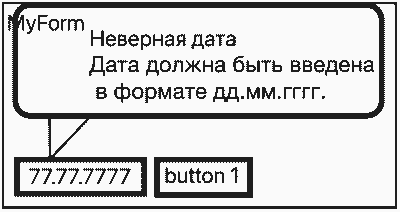

Рис. 11.2. Окно с сообщением об ошибке ввода в поле с маской

После завершения обработчика события `TypeValidationCompleted`, вызывается стандартное событие про
верки `Validating`, поэтому событие `TypeValidationCompleted` не та уж и важно — все проверки можно выполнить в обработчике со бытия `Validating`. Если Вы не знаете, как ввести правильную дату, и программа из-за неверного значения не может завершиться, то очистите поле с маской, выделив его и нажав клавишу `Delete`.

Страница 106-107

---------

# 12. ГРУППИРОВАНИЕ ЭЛЕМЕНТОВ
Размещая элементы управления на форме, разработчик до бавляет их в контейнер этой формы. Однако форма может содержать элементы управления, которые также являются контейнерами. К числу таких контейнеров относятся элементы управления `GroupBox` (рамка) и `Panel` (панель). Существуют и другие контейнеры.

# 12.1. Элемент управления GroupBox
Элемент управления GroupBox отображается в виде рамки с необязательным заголовком. В рамку помещают элементы управления, которые образуют группу. Как правило, с помощью `GroupBox` создают группу переключателей `RadioButton`. Иногда с эргономической целью рамку рисуют вокруг других элементов управления. На рис. 12.1 показано несколько элементов управтения, помещенных в рамку. __Особенность контейнера__ `GroupBox` состоит в том, что действия, выполняемые с контейнером, распространяются на всё его содержимое. Например, для того чтобы сделать все элементы управления контейнера неактивными, достаточно сделать неактивным их контейнер, например: `groupBox1.Enabled = false;`. __Чаще всего__ в программе никаких действий с элементама управления `GroupBox` не выполняется. __Объект__ `GroupBox` не предназначен для отображения полос прокрутки. Если необходим схожий элемент управления с полосой прокрутки, используйте элемент управления Panel.

Страница 108

------

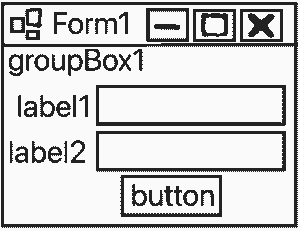

Рис. 12.1. Рамка с элементами управления (Комментарий от пользователя. Group Box один имеет вид серые рамки и в качестве дочерних объектов содержит лэйбл один лэйбл 2 Tex Box один Text Box два и кнопка)

# 12.2. Элемент управления Panel
Элемент управления `Panel` (панель) представляет собой рамно без заголовка. Кроме того, элемент управления `Panel` по смолчанию отображается без границ. Это позволяет сделать из панели невидимую кнопку. Свойство `BorderStyle` отображает стандартную или трехмерную границу панели. __Поскольку элемент__ управления `Panel` выводится из класса `ScrollableControl`, то с помощью свойства `AutoScroll` в элементе управления `Panel` можно включить полосы прокрутки. Если свойство `AutoScroll` имеет значение `true`, все элементы управления, расположенные в панели, можно прокручивать с помощью присутствующих полос прокрутки. __В остальном многое__, что было сказано выше об элементе вправления `GroupBox`, справедливо и для `Panel`.

Страница 109

---------------

# 13. ФЛАЖКИ И ПЕРЕКЛЮЧАТЕЛИ
### 13.1. Элемент управления CheckBox
Элемент управления `CheckBox`, называемый флажком, позволяет пользователю сделать выбор в виде «да» или «нет» (си
рис. 13.1). Выбор отображается в виде галочки с поясняющих текстом или изображением. Отсутствие галочки означает «нет» наличие — «да». 

<div>
    <input type="checkbox" id="scales" name="scales" checked />
    <label for="scales">Флажок «да»</label>
</div>
<div>
    <input type="checkbox" id="horns" name="horns" />
    <label for="scales">Флажок «нет»</label>
</div>
Рис. 13.1. Пример элемента управления CheckBox

Существуст также возможность определить флажок с трем состояниями (см. рис. 13.2). Количество состояний выбирается свойством `ThreeState`. По умолчанию флажок поддерживает два перечисленных выше состояния. Третье состояние — неопределенное.

<div>
    <input type="checkbox" id="scales" name="scales" checked />
    <label for="scales">Флажок «да»</label>
</div>
<div>
    <input type="checkbox" id="horns" name="horns" />
    <label for="scales">Флажок «нет»</label>
</div>
(В HTML состояние Checkbox неопределён не бывает. В c# состояние Checkbox неопределён бывает.)

Рис. 13.2. Вид флажка в трех состояниях

Комментарий от читателей. В markdown можно и так `- [ ]`, `- [x]`. Вот как оно работает, пример:
- [ ] Флажок «нет»
- [x] Флажок «да»

__Названия состояний условны__ — какой смысл будет иметь и или иное состояние, определяет разработчик. Например, трем состояниями можно отметить состояние символов в слове: все прописные; все строчные; строчные и прописные.

Страница 110

--------

Элемент управления `CheckBox` имеет множество свойств, методов и событий. Большинство из них совпадают с аналогичными для `Button`. Есть и свои уникальные члены. Свойство __Appearance__ определяет, отображается ли элемент управления `CheckBox` в качестве обычного элемента управления `CheckBox` (по умолчанию) или как кнопка `Button`. В последнем случае состояния флажка отмечается другим цветом. Для того чтобы установить или прочитать состояние флажка с двумя состояниями, используется свойство `Checked`, которое может иметь значение либо `true`, либо `false`: `if ( checkBox1.Checked ) {/*...*/}`. __Для флажка с тремя состояниями__ используется свойство `CheckState`. Это свойство может принимать одно из следующих значений: Checked — элемент отмечен; Unchecked — элемент не отмечен; Indeterminate — элемент не доступен. __Если для свойства__ `ThreeState` задано значение `true`, свойство `Checked` будет возвращать значение `true` как для отмеченного флажком, так и для неопределенного состояния. На практике в основном используются __два подхода к работе с флажками_. __Во-первых__. Пользователь сначала устанавливает все флажки, а затем нажимает какую-то кнопку и в её обработчике осуществляется чтение состояний флажков. __Во-вторых__: для фиксации смены состояния флажка для него создаётся обработчик события CheckedChanged, которое является событием по умолчанию. Обработчик получает управление, если состояние флажка изменилось. Пример обработчика:

Страница 111

---------

 
    private void checkBox i_ CheckedChanged (object sender, EventArgs e)
    { if (checkBox1.Checked) { /* Флажок установлен. */ } else { /* Флажок сброшен. */ } }
Примечание. В строках, отмеченных точками, должен находиться соответствующий код. __Можно использовать__ один обработчик на все флажки, но тогда нужно будет анализировать первый параметр обработчика, например:

    private void checkBox1_CheckedChanged(object sender, EventArgs e)
    {
        if (((Control)sender).Name == "checkBox1")
        {
            // Здесь должен быть код для проверки состояния checkBox1.
        }
        else
        {
            if (((Control)sender).Name == "checkBox2")
            {
                // Здесь должен быть код для проверки
                // состояния checkBox2.
            }
            else
            {
                // Здесь должен быть код для проверки состояния
                // последнего флажка.
            }
        }
    }

Комментарии читателей. Допустимо использовать If Else без фигурных скобочек В случае тела ветвлений из одного оператора. Будьте добросовестны не допускайте путаницы ставьте фигурные скобочки всегда. Да прибудет бог культа машин с вами.

Страница 112

-------

# 13.2. Элемент управления `RadioButton`
Элемент управления `RadioButton` называется переключателем. На форме, как правило, используются два или более переключателей, образующих группу (см. рис. 13.3). Каждый переключатель группы представляет взаимоисключающий вариант выбора. Переключатель может находиться в одном из двух состой: выключен (Checked = false) или включен (Checked = true).
- [x] Переключатель 1
- [ ] Переключатель 2
- [ ] Переключатель 3

Рис. 13.3. Пример групны переключателей

В группу должны быть объединены зависимые переключатели. Чтобы создать на форме группу или несколько групп переключателей, поместите каждую группу в собственный контейнер, такой как `GroupBox` или `Panel`. Все элементы управления `RadioButton`, не входящие в указанные (и другие) контейнеры, составляют группу контейнера формы. __На рис. 13.4__ показаны две группы переключателей, находящиеся в контейнерах `GroupBox`. В группе пользователь может выбрать и тем самым включить только один переключатель. Рекомендуется на этапе визуальной разработки в окне свойств один из переключателей группы сделать включенным по умолчанию. При выборе пользователем какого-либо выключенного переключателя группы, он включается (появляется точка в кружке), а ранее включенный переключатель этой группы автоматически отключается. Элементы управления `RadioButton` и `CheckBox` имеют аналогичные функции, они позволяют пользователю выбрать вариант или отменить выбор. Разница заключается в том, что несколько элементов управления `CheckBox` можно выбрать одновременно, а элемент `RadioButton` — только один в группе.

Страница 113

-------------------

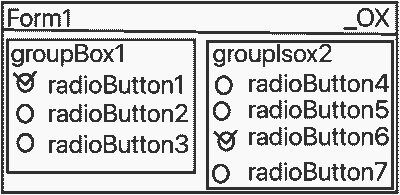

Рис. 13.4. Две группы переключателей, объединенные контейнерами

Чтобы получить или задать состояние элемента `RadioButton`, используйте свойство `Checked`. Основным событием переключателя, как и флажка, является `CheckedChanged`. Техника работы с переключателями остается практически такой же, как и с флажками. Но объем работы снижается, так как после определения установленного переключателя, остальные переключатели группы можно не анализировать. __Пример__. В приведенном ниже фрагменте программы осуществляется поиск первого включенного переключателя контейнера `groupBox1`. Предполагается, что группа, кроме флажков может включать и другие элементы управления, поэтому выпотняется анализ типа элемента управления.

    foreach (var item in groupBox1.Controls)
    {
        if (item is RadioButton)
        {
            RadioButton rb = (RadioButton)item;
            if (rb.Checked)
            {
                txt = rb.Text;
                // Выполним требуемые действия для данного переключатели.
                break;
                // В группе только один включенный переключатель.
            }
        }
    }

Страница 114

----------

В примере свойство `Controls` элемента `GroupBox` возвращает коллекцию элементов управления, включенных в группу. Вели бы контейнер содержал только переключатели, то код стал бы проше.



Страница 115

-----------

# 14. РЕГУЛЯТОРЫ
К регуляторам, описываемым ниже, относятся элементы управления `DomainUpDown` и `NumericUpDown`.
# 14.1. Элемент управления DomainUpDown
Элемент управления `DomainUpDown` позволяет пользоветелям просматривать список текстовых строк и выбирать в нем отдельные строки. Этот элемент выглядит как сочетание текстового поля и пары кнопок для перемещения вверх и вниз по списку (см. рис. 14.1). Иногда элемент управления `DomainUpDown` называют регулятором.



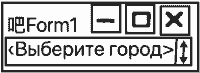

Рис. 14.1. Элемент управления `DomainUpDown`

По сравнению с элементом управления `ComboBox`, достоинством `DomainUpDown` является его сверхкомпактное представление. Но в этом заключается и недостаток. Рекомендуется перед использованием списка отсортировать его в алфавитном порядке. Это облегчит пользователю поиск нужной строки. Для выполнения сортировки необходимо свойству `Sorted` присвоить значение `true`. Это свойство доступно в окне «Свойства». __Другими полезными свойствами__, доступными в окне «Свойства». являются `Text`, `Items`, `ReadOnly` и `Wrap`.
- Свойство __Text__ — получает или задает текст, отображаемый в текстовом поле регулятора. Этого свойства достаточно для решения большинства задач. 
- Свойство __Items__ содержит список строк, которые перебираются в элементе управления.

Страница 116

---------------

Пользователь может вводить в лемент управления свои текст, если свойство `ReadOnly` имеет значение `false`. Значение `true` разрешает пользователю нажимать лишь кнопки «стрелка вверх» и «стрелка вниз», благодаря чему выбор возможен лишь из числа предопределенных значений. __Если для свойства__ `Wrap` задано значение `true`, список закольцовывается, то есть при прокрутке после последней строки списка выводится первая и наоборот. __В коде программы__ разработчик может использовать следующие свойства и методы: __Свойство__ `SelectedIndex` — получает или задает значение индекса для выделенного элемента. Если элемент не выбран, индекс равен -1. __Свойство__ `SelectedItem` — получает или задает текстовое представление выделенного элемента, основываясь на значении индекса элемента, выделенного в коллекции. Если элемент не выбран, `SelectedItem` возвращает `null`. __Если пользователю__ разрешен ввод текста в поле, то нужно понимать, что для введенного вручную текста `SelectedIndex=-1`, `SelectedItem=null`, a `Text !=""`. Такие условия позволяют отличить выбранную строку от введенной.

Страница 117

---------------

__Индексатор__ коллекции `Items` - получает или задает элемент по указанному целочисленному индексу в коллекции. Метод __UpButton__ - отображает предыдущий элемент в коллекции. Метод __DownButton__ - отображает следующий элемент в коллекции объектов. __Создать коллекцию объектов__, отображаемых в элементе управления `DomainUpDown`, можно или программным способом, например с помощью метода `Items.Add`, или в окне «Свойства» с помощью редактора коллекции строк, вызываемого через свойство `Items`. __Пример__. Создадим форму со списком, представленным элементом управления DomainUpDown. Перетащим на форму элемент управления DomainUpDown и в окне его свойств выберем Items. Откроем редактор коллекции строк и введем названия городов (см. рис. 14.2)

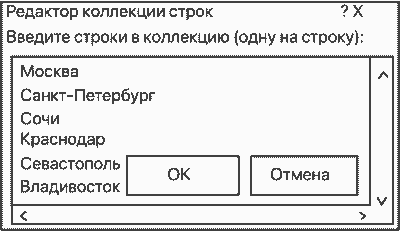

Рис. 14.2. Окно редактора коллекции строк

Нажмём ОК и в окне свойсти сделаем следующие установки:
- Sorted = True
- Text = «Выберите город»
- Wrap = True

В результате получите форму, как на рис. 14,1. Добавим на форму кнопку для отображения введенной или выбранной строки. Создадим для кнопки обработчик события Click и вставим в него следующий код:

    private void button1_Click(object sender, EventArgs e)
    {
        if(domainUpDown1.Text == "<Выберите город>")
        { MessageBox.Show("Вы не выбрали или не ввели название города"); }
        else { MessageBox.Show(domainUpDown1.Text);}
    }

Если в коллекцию программным способом добавляется объект, отличный от `string`, то вызывается метод `ToString` для представления объекта в текстовом виде.

Страница 118

-------

# 14.2. Элемент управления NumericUpDown
Элемент управления `NumericUpDown` представляет собой сочетание текстового поля и пары кнопок со стрелками для выбора значения пользователем. В текстовом поле отображается отдельное числовое значение, имеющее тип `decimal` (см. рис. 14.3).



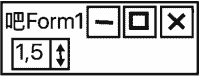

Рис. 14.3. Элемент управления NumericUpDown 119

B отлиЧИе OT `DomainUpDown` элемент управления `NumericUpDown` не содержит списка: его очередное значение вычисляются путем прибавления инкремента к текущему значению. Пользователь может увеличивать и уменьшать число, нажимая кнопки со стрелками «вверх» и «вниз» или клавиши со стрелками «вверх» и «вниз», а также вводить число в поле. Чтобы задать допустимый интервал значений элемента управления, присвойте значення свойствам `Minimum` и `Махimum`. При нажатии клавиши со стрелкой «вверх» значение увеличивается до максимума; при нажатии клавиши со стрелкой «вниз» число уменьшается до минимума. Одним из вариантов применения элемента управления `NumericUpDown` является его использование в качестве регулятора громкости звука, поэтому иногда этот элемент управления называют регулятором.

Страница 119

----------------

Пользователь может ввести число, если только свойство `ReadOnly` имест значение `false`. При снятии фокуса с элемента управления любые введенные данные проверяются на соответствие с минимальным и максимальным числовыми значениями и, если необходимо, сбрасываются до этих значений. __Свойство__ `Value` определяет начальное значение и возвращает введенное или выбранное пользователем значение. __Свойство__ `Increment` определяет шаг изменения значения, когда пользователь нажмет кнопку «вверх» или кнопку «вниз». __Значения всех__ числовых свойств могут быть дробными числами, так как эти свойства имеют тип decimal. __Внимание__. При вводе дробного числа в окне свойств в качестве разделителя необходимо использовать запятую, а не точку, как принято в языке С#. __Внимание__. При вводе дробного числа в окне свойств в качестве разделителя необходимо использовать запятую, а не точку, как принято в языке С#. __Чтобы задать число__ десятичных разрядов, которые будут отображаться в поле, присвойте свойству DecimalPlaces значение, равное этому числу. Чтобы в десятичных числах отображался разделитель групп разрядов, присвойте свойству `ThousandsSeparator` значение `true`. Чтобы значения отображались в шестнадцатеричном формате, присвойте свойству `Hexadecimal` значение true.

Страница 120

-----------

__Пример__. Создадим форму элементом управления NumericUpDown для ввода или выбора номера экзаменационного билета. Перетащим на форму элемент управления NumericUpDown, метку и кнопку для отображения значения регулятора (см. рис. 14.4).

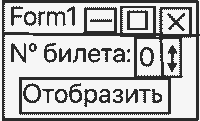

Рис. 14.4. Форма программы

В окне свойств выполним следующие настройки: `Value = 0` ; `Increment = 1` ; `Minimum = 0` ;  `Maximum = 30` ; Создадим для кнопки обработчик события `Click` и вставим в него следующий код:

    private void button1_Click(object sender, EventArgs e)
    {
        if (numericUpDown1.Value == 0)
        {
            MessageBox.Show("Вы не выбрали или не ввели намер билету");
        }
        else
        {
            MessageBox.Show(numericUpDown1.Value.ToString());
        }
    }
    
Страница 121

--------

Начальное значение регулятора равно 0. Такое значенне сигнализирует о том, что пользователь забыл ввести номер экзаминационного билета.

Страница 122

-----------------

# 3. КОМПЛЕКСНЫЙ ПРИМЕР
Мы еще не рассмотрели многие элементы управления, но даже с помощью изученных можно спроектировать пользовательский интерфейе для большого количества задач. __Расширим условне__ ранее решенной нами задачи. Пусть требуется разработать Windows-приложение для конвертирования рублей в одну из трех вылют: доллары, евро или юани. Представим этот список в виде группы переключателей. Курсы валют определим в программе в виде трех констант. С помощью флажка (`CheckBox`) пользователь может заказать распечатку отчета о выполненной операции. Отчет будем имитировать с помощью диалогового окна `MessageBox`. Естественно, эта задача является учебной, в реальной пракпике такие задачи имеют другой интерфейс и другие источники данных. Для решения задачи создадим форму, представленную на рис. 15.1.



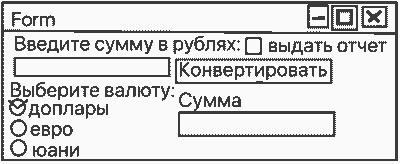

Рис. 15.1. Форма приложения

Страница 123

------------------

Все проверки и вычисления будем выполнять в обработчике события `Click` кнопки `button1`. Приведем текст программы, решающей поставленную задачу (файл `Form1.cs`).

    using System;
    using System.Windows.Forms;
    public partial class Form1 : Form
    {
        float cursDollar = 60.0f;
        float cursEuro = 70.0f;
        float cursYuan = 10.0f:
        public Form1() { InitializeComponent); }
        private void button1_Click(object sender, EventArgs e)
        {
            float rubli, currency;
            float curs;
            string name;
            textBox1.Text = textBox1.Text.Replace('.', ',');


            if (
                !float.TryParse(textBox1.Text, out rubli) 
                || rubli <= 0
            )
            {
                MessageBox.Show("Неправильно введена сумма в рублях!");
                textBox1.Focus();
                return;
            }
            if (radioButton1.Checked)
            {
                curs = cursDollar;
                label2.Text = "Сумма в долларах:";
                name = "долларов";
            }
            else if (radioButton2.Checked)
            {
                curs = cursEuro;
                label2.Text = "Сумма в евро:";
                name = "евро";
            }


            else
            {
                curs = cursYuan;
                label2.Text = "Сумма в юани:";
                name = "юаней";
            }
            currency = rubli / curs;
            textBox2.Text = currency.ToString("0.00");

            if (checkBox1.Checked)
                MessageBox.Show(
                    string.Format(
                        "Конвертировано: {0} руб. "
                        + "Выдать на руки: {1} {2}"
                        ,textBox1.Text
                        , textBox2.Text
                        , name
                    )
                );
        }   
    }

Комментарии от читателей. Данный программный код безграмотен. Причина такого умозаключения в следующем.. Нельзя писать функции которым занимают место больше чем один размах экрана. Иначе нужно их разбивать на под функции или шаги в скобках Step1 Step2 ... И так далее. Вместо синтаксической конструкции if else предпочти не использовать вы Switch case. Причина, он аппарат быстрее.


Страница 124

-----------------

__Примечание__. В реальной задаче конвертирования валют целесообразно вместо группы переключателей использовать комбинированный список ComboBox, а в качестве источника текуших курсов валют - сайт Центробанка.

Страница 125

----------

# 16. ЗАДАНИЯ ДЛЯ САМОСТОЯТЕЛЬНОЙ РАБОТЫ
Мы изучили большое количество разных элементов управления для создания развитого интерфейса пользователя. Ниже приведены задания на разработку Windows-приложений. Задания имеют разную сложность. Вам предлагается выбрать и решить наиболее интересные для Вас задачи. В качестве примера приведено решение двух задач.

__Задача 1__. Разработать Windows-приложение, вычисляющее сумму двух чисел, введенных с клавиатуры в текстовые поля.

__Задача 2__. Разработать Windows-приложение, конвертирующее выбранную валюту в другую валюту. Вид исходной и целевой валюты должен выбираться из соответствующих перечней.

__Задача 3__. Разработать Windows-приложение «Обменный пункт». Примечание: данная задача отличается от предыдущей наличием двух курсов: покупки и продажи.

__Задача 4__. Разработать Windows-приложение для вычисления объемов трех фигур: шара, цилиндра и конуса. Объемы вычисляются по формулам: $V_ш = 4 \pi R3 / 3$; $V_ц = \pi R2h$; $V_k= \pi R3 h / 3$;

__Задача 5__. Разработать Windows-приложение «Вклад», вычисляющее состояние вклада на конец года. Ввести с клавиатуры в текстовые поля следующие значения: сумма вклада — S; процент по вкладу (начисляется один раз в конце года) — Р; год. Состояние вклада D на конец года вычисляется по формуле: $D = S + S * P / 100 $; Предусмотреть возможность вычисления суммы на каждый следующий год. Реализовать недоступность кнопок с помощью свойства `Enable`. Разработать три варианта оконного интерфейса приложения в соответствии с рис. 16.1 — 16.3.

Страница 126

----------

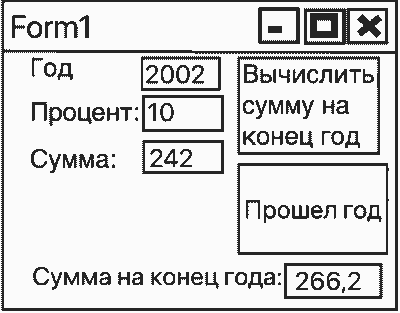

Рис. 16.1. Первый вариант оконного интерфейса приложения

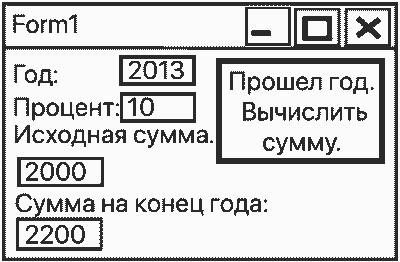

Рис. 16.2. Второй вариант оконного интерфейса приложения



Страница 127

---------

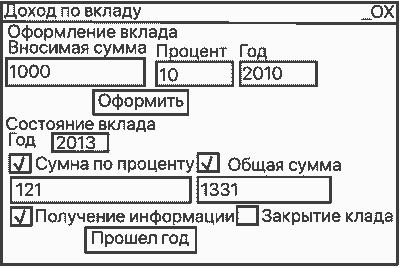

Рис. 16.3. Третий вариант оконного интерфейса приложения

__Задача 6__. Разработать приложение-калькулятор. пользователь должен вводить два числа и выбирать вид операции (+, -, \*, /), отображаемой в переключателях. По кнопке «Вычислить» (или «=») должен вычисляться и отображаться результат. Предусмотреть два способа извещения пользователя об ошибке формата ввода: 1) через `Label` (очищать это поле в обработчике `textBox1_TextChanged`); 2) с помошью `MessageBox`.

Используйте установку фокуса ввода. Разработайте четыр варианта программы: __Во-первых__, 1. Анализ вида операции выполнить в обработчике события Click элемента Button. __Во-вторых__, 2. Использовать четыре обработчика событий CheckedChanged элемента RadioButton для запоминания вида операции. __В-третьих__, Использовать один общий обработчик события CheckedChanged: элемента RadioButton для запоминания вида операции. __В четвёртых__, Организовать вывод истории вычислений в многострочное текстовое поле. С помощью переключателя задавать точность результата без округления и с округлением. Возможный вариант окна приведен на рис. 16.4.

Страница 128

-----------

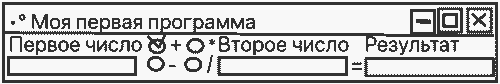

Рис. 16.4. Окно программы Калькулятор
 
__Задача 7__. Разработать приложение для расчета платежа за электроэнергию с учетом текущего и предыдущего показаний счетчика, а также с учетом действующего тарифа.



__Задача 8__. Разработать Windows-приложение для нахождения корней квадратного уравнения. В окне должны отображаться три элемента TextBox для ввода коэффициентов, кнопка «Вычислить» и необходимые надписи. Для вывода результата используйте элемент Label.



__Задача 9__. Разработать Windows-приложение для вычисления выбранной функции. Вид окна приведен на рис. 16.5. Для выбора функции использовать три элемента RadioButton. Для ввода значения и вывода результата использовать элементы ТехВох. Результат отформатировать (выводить 2 знака после запятой), если со ветствующий режим выбран (стоит галочка в элементе Checke, Вычисления выполнять при нажатии кнопки «Вычислить».



Страница 129

---------

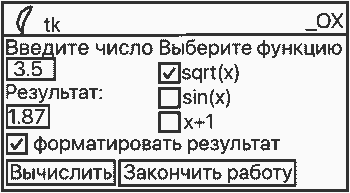

 Рис. 16.5. Окно программы вычисления функций



__Задача 10__. Разработать Windows-приложение для провер введенного числа. Условия проверки показаны в окне на рис. 16 Для задания условий использовать 4 флажка. Результат проворо вывести в поле «Результат». Условия выбирать независимо друг от друга. Если условие не выбрано, то оно не должно участввать в проверке. Проверку выполнять при нажатии кнопки «Проверить».



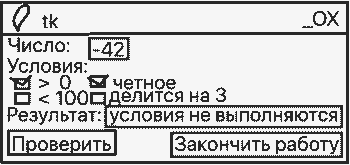

Рис. 16.6. Окно программы задачи 10



Страница 130

----------------

__Задача 11__. Разработать Windows-приложение для отображения матрицы целых чисел размером NxM (размерность ввести с экрана). Сформировать матрицу и заполнить её случайными числами из диапазона $[-50, 50]$. Сформированную матрицу отобразить в многострочном элементе TextBox с горизонтальной и вертикальной полосами прокрутки. Возможный вариант окна представлен на рис. 16.7.



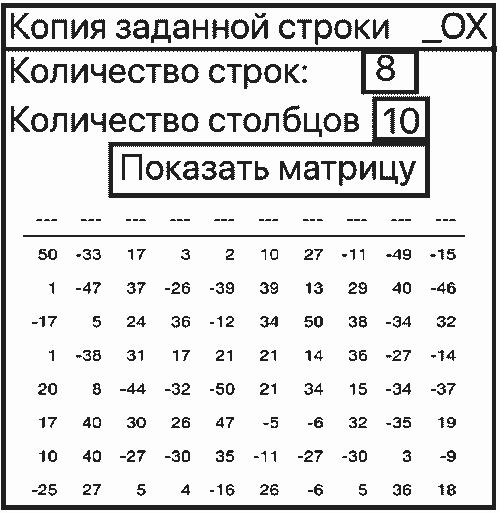

Рис. 16.7. Окно программы задачи 11

Текст программы (файл Form1.cs):

    using System;
    using System.Windows.Forms;
    namespace MultiLineTextBox
    {
        public partial class Form1:Form
        {
            public Form1() { InitializeComponent(); }
            private void показать_Click(object sender, EventArge e)
            {
                int m = int.Parse(textBox 1, Text); // Количество строк
                int n = int.Parse(textBox2, Text); // количестве столбцов
                Random end = new Random();
                int[,] a = new int[m, n]; //Формируемая матрица
                // Инициализация матрицы:
                for (int i = 0; i < m; i++)
                    for(int j = 0:j ≤ n; j++）
                        a[i,j] = rnd.Next(-50, 51);
                multiLineTextBox.Text = "";
                string s = ""; // Для строки матрицы,
                // Заполнение TextBox,
                for (int i = 0; i < m; i++)
                {
                    for (int j = 0; j < n; j++)
                        s = s + string.Format("(0,5)", a[i, j]);
                    multiLineTextBox.Text += "\r\n" + s;
                }
            }
        }
    }

Страница 131 - 132

----------
 



В окне свойств Visual Studio элементам управления были присвоены следующие значения:

|Элемент управления|Свойство|Значение|
|---|---|---|
|Многострочный Textisox|Name|multiLineTextBox|
|''|Multilined|true|
|''|Scrollbars|Both|
|''|WordWrap|false|
|''|Font|Lucida Console|
|Кнопка Button|Name|Показать|
|''|Text|Показать матрицу|

Ряд значений, присвоенных свойствам, здесь не приведен, так как эти настройки очевидны. Обратите внимание на следующие моменты. В программе для её упрощения не делается проверка полей `textBox1` и `textBox2`. Для отображения столбцов матрицы, выровненных по вертикали, в элементе `TextBox` установлен моноширинный шрифт `Lucida`. Console, а также задается одинаковая ширина для всех элементов матрицы в методе Format: `string.Format("{0,5}", a[l,j])`

__Задача 12__. Разработать `Windows`-приложение для формирования и отображения квадратной матрицы символьного типа размером `NxN`. Элементы матрицы должны отображаться в элементах `Label`, которые должны создаваться разработчиком в режиме разработки кода (то есть, вручную). Квадратная матрица должна заполняться случайными значениями по правилу: в строки с четными номерами заносятся прописные латинские буквы, а в строки с нечетными номерами символы-цифры. Выделить цветом главную и побочную диагонали матрицы. Отобразить символы главной диагонали в элементе Label.

Страница 133

------

Пример матрицы:

|A|M|W|Q|E|
|---|---|---|---|---|
|6|1|7|8|3|
|Q|Z|A|D|T|
|4|2|3|9|5|
|A|X|R|C|V|

Для приведенного примера главная диагональ: A1A9V. Приведем решение этой задачи. В учеоных целях покажем как можно удалять элементы из контейнера формы и добавлят, новые. Установим ограничение: N<=30. В начале работы приложения окно должно отображать элементы управления для ввода количества строк (см. рис, 16.8).



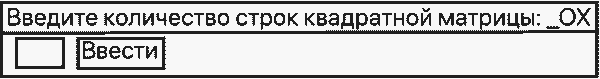

Рис. 16.8. Исходное окно приложения
 
Для отображения элементов матрицы в программе используется массив элементов управления Label (см. рис. 16.9). После ввода количества строк и нажатия кнопки «Ввести» программа удалит из коллекции элементов формы текстовое поле и кнопку, создаст двумерный массив типа Label и заполнит его случайными символами. Для размещения элементов массива в окне в программе вычисляются их координаты. Также устанавливается положение надписи с элементами главной диагонали, и настраиваются новые размеры формы.

Страница 134

-------

||||||||_|O|X|
|---|---|---|---|---|---|---|---|---|--|
|__O__|P|P|I|M|K|C|P|W|H|
|7|__5__|5|8|7|4|2|7|7|0|
|S|F|__P__|G|L|L|H|A|K|R|
|7|8|0|__3__|2|2|0|2|7|2|
|K|K|Q|X|__A__|S|D|B|A|O|
|2|6|1|5|0|__3__|8|3|7|0|
|C|B|E|F|K|X|__L__|G|R|P|
|4|0|8|5|5|2|5|__6__|2|6|
|H|F|A|V|L|E|T|M|__I__|W|
|2|5|3|7|1|3|2|3|4|__0__|

Главная диагональ: О 5 Р 3 А 3 L 610

Рис. 16.9. Окно приложения с матрицей и результатом

Поскольку элементы управления `Label` добавляются в коллекцию формы в цикле, то в программе откладывается их отображение, пока они не будут полностью сформированы и добавлены в коллекцию.

Страница 135

-----

Текст программы (файл Form1.cs):

    using System;
    using System.Drawing;
    using System.Windows.Forms;

    namespace WindowsApplication1
    {
        public partial class Form1 : Form
        {
            public Form 1(){ InitializeComponent); }
            private void button1_Click(object sender, EventArgs e)
            {
                Random rnd = new Random();
                int n;
                if (
                    !int.TryParse(textBox1.Text, out n) 
                    || n > 30
                )
                {
                    MessageBox.Show(
                        "Вы ввели неправильное значение!»
                        + "\nЗначение д.б. числом, меньшим 31."
                        + "\n\n Повторите ввод."
                    );
                    textBox1.Focus();
                    return;
                }


                this.SuspendLayout();
                // Отложить отображение формы.
                // Удаление элементов управления из формы.
                Controls.Remove(textBox1);
                Controls.Remove(button1);
                label1.Text = "Главная диагональ: ";
                Label[,] table = new Label[n, n];
                // Создаем матрицу из элементов Label.
                for (int i = 0; 1 < n; i++)
                {
                    for (int j = 0; j < n; 1++)
                    {
                        table[i, j] = new Label();
                        table[i, j].AutoSize = true;
                        table[i, j].Location = new Point(20 + 20 * j, 20 + 20 * i);
                        if (i % 2 == 0)
                        {
                            // Если строка четная....
                            table[i, j].Text = (
                                    (char)md.Next('A', 'Z')
                                ).ToString()
                            ;
                        }

Страница 136

----------------



                        else
                        {
                            // Если строка нечетная.
                            table[i, j].Text = (
                                md.Next(10)
                                ).ToString()
                            ;
                        }
                        // Измененяем цвет у диагонального
                        // элемента матрицы.
                        if (
                            i == j 
                            || i == n - j-1
                        )
                            table[i,j].BackColor = Color.Coral;
                        // Добавим в контейнер формы.
                        Controls.Add(table[i, j]);
                        // Формируем строку с элементами
                        // главной диагонали.
                        if (i == j)
                            label1.Text += tablet[i,j].Text + " ";

                    }
                }

                // Устанавливаем положение элементов label1.
                label1.Location = new Point(10, table[n - 1, 0].Location.Y + 30);
                // Настраиваем размер формы.
                int pt = Math.Max(label1.Text.Length + 25,table(O, n - 1].Location.X + 35);
                this.ClientSize = new Size(pt, label1.Location.Y + 30);
                // Разрешаем отображение элементов
                // управления формы.
                this.ResumeLayout(false);
                this.PerformLayout();
            }
        }
    }

Страница 137

--------------

Естественно, данную программу можно улучшить применив для матрицы контейнер типа Panel. Так же можно добавить кнопку для возврата к неходному формату окна.

Страница 138

---------------------

# 17. СПИСОЧНЫЕ ЭЛЕМЕНТЫ УПРАВЛЕНИЯ
### 17.1. Общие сведения
Списки `Windows Forms` представлены тремя элементами управления: простой список (класс `ListBox`), комбинированный список (класс `ComboBox`) и список с флажками (класс `CheckedListBox`). Эти три списка приведены на рис. 17.1.



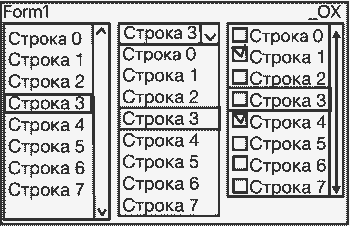

Рис. 17.1. Простой список (слева), комбинированный список (в центре) и список с флажками (справа)

__Замечание__. Читатель должен различать, о каких списках идет речь: списки как элементы управления или списки как коллекции данных. Элементы управления `ListBox`, `ComboBox` и `CheckedListBox` будем называть обобщенным термином «списочные элементы управления». В списочных элементах управления автоматически создаются полосы прокрутки, если количество строк больше, чем можно отобразить в элементе. __Простой список__ — элемент управления `ListBox` — отображается в виде списка строк, из которых пользователь может выбрать нужную щелчком мыши (см. рис. 17.1, слева). __Комбинированный список__ - элемент управления `ComboBox` - дополнительно к списку `ListBox` отображает текстовое поле (поле ввода), в котором отображается текущий элемент. Список раскрывается по щелчку кнопки со стрелкой (см. рис, 17.1, справа от текстового поля) и закрывается после выбора строки щелчком мыши. На рис. 17.1, в центре, показан раскрытый комбинированный список. Обычно же отображается только текстовое поле (см, рис. 17,2, в центре), что весьма экономит свободное пространство формы.



Страница 139

-----------

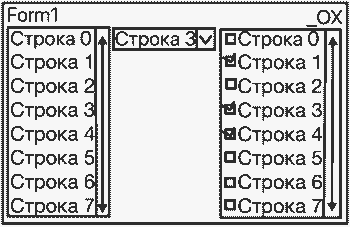

Рис. 17.2. Комбинированный список (в центре) свернут



__Список c флажками__ - элемент управления `CheckedListBox` — это постоянно раскрытый список, где слева от кажной строки отображается флажок (см. рис. 17.2, справа). Элементы всех списков имеют тип object, поэтому в список можно добавить объект любого типа.



Страница 140

-------------------

Поведение элементов управления `ListBox`, `ComboBox` или `CheckedListBox` в отдельных аспектах очень похоже друг на друга, и в некоторых случаях они взаимозаменяемы, поэтому в данном подразделе рассмотрим общую функциональность списочных элементов управления. Перечислим общие методы и свойства списочных элементов управления. __Методы__: 
- __BeginUpdate__ — запрещает рисование в элементе управления вплоть до вызова метода EndUpdate. Метод полезен при добавлении в список большого количества объектов.
- __EndUpdate__ - возобновляет рисование списочного элемента управления после того, как оно было приостановлено методом `BeginUpdate`.
- __FindString__ — производит поиск первого элемента в списке, который начинается с указанной строки или индекса.
- __FindStringExact__ — ищет первый элемент в списке, точно соответствующий указанной строке.
- __FindStringExact__ — ищет первый элемент в списке, точно соответствующий указанной строке.
- __GetSelected__ — возвращает значение, определяющее, выбран ли указанный элемент.
- __Refresh__ - немедленно перерисовывает себя и все дочерние элементы.

__Свойства__:
- __AllowSelection__ — получает значение, указывающее, разрешается ли в списочном элементе управления в настоящее время выбор позиций списка.
- __DisplayMember__ — получает или задает свойство объекта, которое будет отображаться на экране.
- __DisplayMember__ — получает или задает свойство объекта, которое будет отображаться на экране.
- __HorizontalScrollbar__ — получает или задает значение, определяющее, отображается ли горизонтальная полоса прокрутки в элементе управления.
- __Items__ - получает коллекцию элементов списка. Коллекция и есть список.
- __ScrollAlwaysVisible__ — получает или задает значение, определяющее, отображается ли вертикальная полоса прокрутки.
- __Text__ - получает строку, соответствующую выбранному в на стоящий момент элементу, или выполняет поиск этого текста.
- __SelectedIndex__ - получает или задает индекс выделенного в Настоящий момент элемента коллекции.
- __SelectedItem__ - получает или задает выбранный в настоящий момент элемент коллекции.
- __Sorted__ - получает или задает значение, показывающее, упорядочены ли отображаемые строки списка по алфавиту.

__События__:

- __SelectedIndexChanged__ - происходит при щелчке мышкой на строке списка.

Страница 141

-----------

__Коллекция Items__. Как было сказано выше, списочные элементы управления сожержат коллекцию строк (объектов), к которой можно получить доступ с помощью свойства Items. Основным средством для работы коллекцией является индексатор `this[индекс]`, который возвращает из коллекции элемент по указанному индексу. Также для работы с коллекцией можно использовать следующие методы коллекции:
- __Add__ - добавляет один объект в конец коллекции.
- __AddRange__ — добавляет массив объектов в конец коллекции.
- __Insert__ — вставляет объект в конкретное место коллекции.
- __Remove__ — удаляет из коллекции заданный элемент.
- __RemoveAt__ — удаляет из коллекции элемент с заданным индексом.
- __Clear__ - удаляет из коллекции все элементы.

Страница 142

-----------

__Класс ListControl__. Все перечисленные списочные элементы управлення имеют общую функциональность, унаследованную от класса `ListControl`. Комбинированный список наследует члены класса `ListControl` непосредственно, а `CheckedListBox` — опосредованно. Класс `ListControl` предоставляет общую реализацию членов для всех списочных элементов управления, из которых наиболее значимыми являются свойства, определяющие привязку списка к источнику данных: `DataSource`, `DisplayMember`, `SelectedValue` и `ValueMember`. __Примечание__. Ниже, в данном подразделе, все примеры будут даны для списка `ListBox`, хотя эти примеры в равной степени справедливы и для `ComboBox` и `CheckedListBox`.



__Как заполнять списочные элементы управления данными__. Создать коллекцию элементов можно либо в режиме визуальной разработки, либо вручную в режиме кода. В режиме визуальной разработки в окне «Свойства» доступно свойство `Items`, которое определяет коллекцию элементов типа `string`. Это простейший способ создания коллекции. __Заполнить коллекцию элементами__ других типов, например объектами типа Student, можно вручную в режиме кода. Чаще всего добавление элементов осуществляется в обработчике события `Form1_Load`. Для создания списочного элемента управления и добавления в него элементов следует использовать метод `Add` или `AddRange`. Метод `Add` может добавить любой объект в конец коллекции списочного элемента управления. Метод `AddRange` добавляет в конец коллекции массив объектов. Для вставки объекта в требуемое место списка следует использовать метод `Insert`. __Существует еще один способ__ добавления элементов: использование внешнего списка, например списка `List<T>`. Этот способ реализуется посредством привязки элемента управления к источнику данных с помощью свойства `DataSource`. Этому вопросу посвящен отдельный раздел данного учебника. Если элементами списка являются значения встроенного типа данных, то на экране отображаться будут эти значения. Если элементами списка являются объекты с несколькими свойствами, то списочный элемент управления отображает на экране то свойство (поле) объекта, которе задано свойством `DisplayMember`. Если это свойство не определено, то для отображения объекта вызывается его метод `ToString`.

Страница 143

------------

__Примечание__. Неемотря на то что отображается одно свойство или строка, возвращаемая методом Testring, список храни ссылки на объекты, а не строки. __Еcли нужно__, чтобы в одной строке списка одновременно отображалось два и более свойств объекта, значения этих свойсть можно упаковать в одну строку и возвращать ее методом `ToString`. __Ecли требуется__ в списочном элементе управления отображать данные в виде таблицы с вертикально выровненными столбнями, рекомендуется для текста использовать моноширинный шрифт, например `Lucida Console` или `Consolas`, и каждое табличное значенне выровнять до общей ширины с помощью метода `string.Format`. Для этих целей можно также использовать и методы `string.PadRight` или `string.PadLeft`. В класеах `ListBox` и `CheckedListBox` для выравнивания данных по столоцам можно использовать знаки табуляции, если свойство `UseTabStops` это разрешает (`true`), Иначе, управляющий символ `\t` будет отображаться в тексте как два символа. Позиции табуляции устанавливаются предварительно и используются по умолчанию. Чтобы использовать настраиваемые позиции табуляции, установите для свойства `UseTabStops` значение `false`, для свойства `UseCustomTabOffsets` установите значение `true`, и добавьте пользовательские значения в коллекнию `CustomTabOffsets`.



__Пример__. В приведенном ниже коде в список `listBox2` добавляются объекты класса `Student`. Для отображения элементов списка используются строки, возвращаемые методом `Student.ToString`. Для списка `listBox2` (см. рис, 17.3, в центре) задан шрифт `Lucida` `Console`. Список объектов отображается в виде списка строк, поля которых выравнены по вертикали, образуя таблицу. В обработике `listBox2_SelectedIndexChanged` выбирается текущий объект. В `label3` выводится строка, возвращаемая методом `ToString` для вы бранного объекта, а в `label4` выводится свойство `Name` этого обьекта. О работе с выбранными элементами будет подробнее описано в этом разделе ниже.

Страница 144

-------------

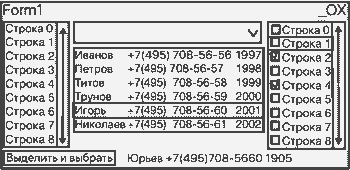

Рис. 17.3. Отображение списка объектов (в центре). Заранее извините. Картинка восстановлена по внешнему виду с фото. Идея но не смысл...

    class Student
    {
        public string Name { get; set; }
        public string Phone { get; set; }
        public int Age { get; set; }
        public override string ToString() => string.Format("{0,-10} {1} {2}", Name, Phone, Age);
    }
    using System;
    using System.Collections.Generic;
    using System.Windows.Forms;
    public partial class Form1 : Form
    {
        public Form1() { InitializeComponent(); }
        private void Form1_Load(object sender, EventArgs e)
        {
            listBox2.BeginUpdate();
            listBox2.Items.Add(new Student { Name = "Иванов", Phone = "+7(495) 708-56-56", Age = 1997 });
            listBox2.Items.Add(new Student { Name = "Петров", Phone = "+7(495) 708-56-57", Age = 1998 });
            listBox2.Items.Add(new Student { Name = "Титов" , Phone = "+7(495) 708-56-58", Age = 1999 });
            listBox2.Items.Add(new Student { Name = "Трунов", Phone = "+7(495) 708-56-59", Age = 1996 });
            listBox2.Items.Add(new Student { Name = "Юрьев" , Phone = "+7(495) 708-56-60", Age = 1995 });
            listBox2.Items.Add(new Student { Name ="Николаев",Phone = "+7(495) 708-56-60", Age = 1995 });
            listBox2.EndUpdate();
        }
        private void listBox2_SelectedIndexChanged(object sender, EventArgs e)
        {
            label3.Text = listBox2.Text;
            label4.Text = ((Student)listBox2.SelectedItem).Name;
        }
    }


Страница 145 - 146

----------

__Свойства DisplayMember и ValueMember__. Выше было сказано, что свойство DisplayMember используется для определения, какое свойство объекта должно отображаться в элементе. __Пример__. Используем свойство DisplayMember для отображения свойства Name. `listBox2.DisplayMember = "Name";` Свойство `DisplayMember` должно получать в качестве значения строку с именем открытого свойства, а не с именем открытого поля. Если вместо свойства использовать открытое поле, то данная возможность работать не будет. Свойство `ValueMember` в случае привязки определяет, какое поле будет использоваться в качестве возвращаемого значения. Однако, если список не привязан к источнику данных (не используется свойство DataSource), то это свойство использовать нельзя. К счастью, такое ограничение не является проблемой: ниже будет показано, как можно получить доступ к любому открытому члену текущего объекта. __Как работать со списочными элементами управления__. Как правило, пользователь выбирает какой-либо элемент списка, а программа в нужный момент получает этот выбор. Чтобы этот процесс работал, необходимо решить три основные вопроса: __Во-первых__, в каком обработчике события фиксировать выбор пользователя; __во-вторых__, в каком обработчике события фиксировать выбор пользователя; __в-третьих__, какое поле должно отображаться, а какое являться возвращаемым значением, если элементами списка являются обьекты с несколькими свойствами.

Страница 147

-----------

При выборе элемента списка возникает событие `SelectedIndexChanged`, информирующее программу о щелчке
мышкой по строке списка. Сколько раз подряд пользователь будет выделять одну и ту же строку, не делая нового выбора, столько раз обработчик события `SelectedIndexChanged` будет получать управление. Обработчик этого события создается автоматически по двойному щелчку списка на форме. Для чтения выбранной строки списка можно использовать свойство `Техt`. Для получения ссылки на объект, соответствующий выбранной строке, можно использовать свойство `SelectedItem`. __Если задана привязка__ списочного элемента управления к источнику данных, то для получения возвращаемого значения можно использовать и свойство `SelectedValue`. Это свойство получает или задает значение свойства объекта, указанного свойством `ValueMember`. Если в `ValueMember` свойство не указано, `SelectedValue` возвращает ссылку на текущий объект. Если привязка не задана, то `SelectedValue = null`. __Примечание__. Следующие понятия в данном учебнике используются как тождественные: «выбранный элемент», «выделенный элемент» и «текущий элемент». Свойство Text возвращает выделенную и отображаемую в списке строку в формате string, например:

    string curitem;
    private void listBox1_SelectedIndexChanged(object sender, EventArgs e)
    { curitem = listBox1.Text; } 

Страница 148

----------

Свойство `SelectedItem` возвращает элемент как ссылку объект типа `object`, поэтому необходимо приведение объекта к требуемому типу, например:

    string curItem:
    private void listBox1_SelectedIndexChanged(object sender, EventArgs e)
    { curitem = (string)listBox1.SelectedItem; }

__Внимание__. Если строка не выбрана, использование свойства `Text` или `SelectedItem` без проверки может привести к возбуждению исключения, поэтому разработчик должен предвидеть эту ситуацию. __Если элементами списка являются объекты__, имеющие несколько свойств, то SelectedItem, возвращая ссылку, позволит выбрать требуемое свойство объекта. Например, в программе, отображающей окно на рис. 17.3, фамилия студента, выбранного в списке, выводится с помощью следующего кода:

    private void listBox2_SelectedIndexChanged(object sender, EventAras e)
    { label4.Text = ((Student)listBox2.SelectedItem).Name; }

__Если в Вашем распоряжении__ нет ссылки, но есть индекс текущего элемента, ссылку можно извлечь из коллекции, например: `label2.Text = ((Student)listBox2.Items[listBox2.SelectedIndex]).Phone;`. __Если разработчик хочет__ получить значение выбранного в списке элемента в обработчике события какого-либо другого элемента управления, например `Button`, то ему нужно учитывать, что пользователь к тому моменту может еще не сделать выбор элемента в списке. В этом случае можно проверить свойство `SelectedIndex`, возвращающее индекс выбранного элемента. Все элементы рассматриваемых списков составляют коллекцию, поэтому нумерация элементов начинается с нуля. Если элемент не выбран, свойство SelectedIndex возвращает -1, а свойство `Text` — пустую строку ("").

Страница 149

------------

__Пример__. Получение выбранной строки с проверкой на её существование.

    string curitem;
    private void button1_Click(object sender, EventArgs e)
    {
        curitem = "":
        if(listBox1.SelectedIndex != -1)
        {curitem = listBox1.Text;}
        else {MessageBox.Show("Вы забыли выбрать город в списке городов.");}
    }
Для проверки можно использовать и свойство `SelectedItem`, например: `if (listBox1.SelectedItem == null) ...`. Если строка не выбрана, то можно использовать значение из списка по умолчанию, например: 

    string curItem;
    private void button1_Click(object sender, EventArgs e)
    {
        if(listBox1.SelectedIndex ! = -1)
        { curItem = listBox1.Text; }
        else { curItem = "Москва"; }
    }

Страница 150

-------------

Вместо SelectedIndex можно использовать и свойство Text: если ему присвоить строковое значение, то списочный элемент Управления будет искать объект в коллекции, соответствующий указанному тексту. Если найдет, то выделит его. __Поскольку свойство__ Selectedindex доступно и на запись, можно заранее установить какой-либо элемент в качестве выбранного. В начале работы программы список не содержит выделенного элемента до тех пор, пока пользователь не сделает выбор, поэтому рекомендуется в обработчике Form_Load выделить элемент за пользователя. После того как сделано выделение элемента, это выделение можно только изменить, то есть список всегда будет содержать выбранный элемент. В этом случае проверка индекса на значение -1 в дальнейшем не потребуется. __Исключение__, конечно, составляет пустой список и программное снятие выделения. Пример. Выбрать первый элемент списка.

    private void Form1_Load(object sender, EventArgs e)
    {
        listBox1.SelectedIndex = 0;
    }

Решение третьего вопроса об элементах списка, являющихся объектами с несколькими свойствами, проще всего решается с помощью привязки списочного элемента управления к источнику данных (с помощью свойства списка DataSource) и использования свойств списка DisplayMember и ValueMember.

Страница 151

---------------

__Полезная функциональность__. Чтобы вставить элемент в нужное место списка или удалить элемент из списка, используйте, соответственно, методы коллекции `Items.Insert` и `Items.Remove` или `Items.RemoveAt`. Для очистки коллекции элементов используется метод `Items.Clear`. Примеры.
    
    listBox1.Items.Insert(1, "Москва"); // Вставить элемент под индексом 1
    listBox1.Items.RemoveAt(1); // Удалить элемент с индексом 1,
    listBox1.Items.Remove(comboBox1.Selecteditem); // Удал, текущий
    listBox1.Items. Remove("Лондон"); // Удалить элемент "Лондон"
    listBox1.Items. Clear; // Очистить коллекцию элементов.

Сортировка коллекции. Бели элементы в коллекции находятся в неотсортированном виде, то свойство Sorted, доступное в окне «Свойства», позволит отсортировать эту коллекцию по алфавиту, причем в режиме визуальной разработки элементы будут добавлены в файл Form1.Designercs уже в отсортированном порядке. Сортировка возможна, если элемент управления не привязан к данным с помощью свойства DataSource. Пример. Отсортировать список. `listBox1.Sorted = true;` __Если элементами__ коллекции (списка) являются объекты с несколькими свойствами, то сортировка элементов осуществляется по соответствующим им строкам, отображаемым в списочном элементе управления. __При добавлении__ элементов в упорядоченный ListBox они автоматически перемещаются в соответствующую позицию отсортированного списка, поэтому целесообразно сначала выполнить сортировку элементов, а затем добавлять новые. Подробнее о возвращаемых значениях. Проиллюстрируем различия свойств Text, SelectedItem и SelectedIndex на примере элемента управлення listBox1 (см. рис. 17.4). Расемотрим два случая. 

Страница 152

------------

__Первый случай__: элементами списка являются элементарные данные, к которым относятся встроенные данные языка C#. Это — строки, числа и символы.



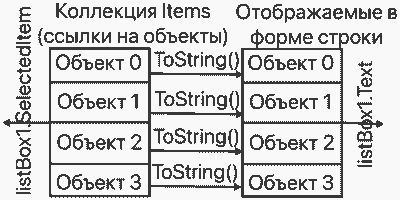

Рис. 17.4. Коллекция элементов и их отображение в форме

Если объектами коллекции являются строки типа `String`, то содержимое коллекции и его отображение в элементе управления совпадают, то есть свойства `Text` и `SelectedItem` будут возвращать одинаковые значения. Естественно, для объектов-строк метод `ToString` системой не используется. Чтобы в качестве коллекции использовать числа, можно создать эту коллекцию в окне «Свойства», а затем открыть файл `Form1.Designer.cs`, найти в нем код, сгенерированный для списочного элемента управления, и в методе `AddRange` заменить строки на числа, убрав символы ", например "0" меняем на 0. Для строксимволов `(char)` заменяем символ" на одиночную кавычку ('). Теперь свойства `Text` и `SelectedItem` будут возвращать разные значения, например для элемента, равного 2:

|---|---|
|--:|:--|
|listBox1.Text|возвратит строку "2"|
|int.Parse(listBox1.Text)|возвратит число 2|
|listBox1.SelectedItem|возвратит ссылку на object|
|(int)listBox1.SelectedItem|возвратит число 2|
|listBox1.SelectedItem.ToString()|возвратит строку "2"|

Как следует из примера, получить из строки исходное числ достаточно просто. Чтобы для этого случая создать новый елемент, достаточно в методе Add указать новое значение, например listBox1.Items.Add(77).

Страница 153

----------

__Второй случай__. Вернемся к программе, связанной с рис. 173, и рассмотрим список `listBox2`. Элементами коллекции являются объекты `Student`. Эти объекты отображаются как строки, возвра щаемые методом `ToString`. Какие значения теперь будут возвращать свойства `Text` , `SelectedItem`? Например, для пятого элемента `(index = 4)` буду возвращены следующие значения:
- `listBox2.Text` возвратит строку "Юрьев +7(495) 708-56-60 1995"
- `listBox2.SelectedItem` возвратит ссылку на объект типа `object`
- `(Student)listBox2.SelectedItem` возвратит ссылку на объект типа `Student`
- `((Student)|ListBox2.SelectedItem).Name` возвратит строку "Юрьев"
- `((Student) listBox2.SelectedItem).Age` возвратит число 1995

Свойство `SelectedIndex` не связано с содержимым элемент или его отображением — оно всегда возвращает индекс выделае ной строки, который также равен индексу выделенного элемент Если строка не выделена, возвращается - 1.



__Добавление нового объекта в список__. Создать новый элемент списка можно, используя кнопку и текстовые поля для ваших аргументов конструктора, например:

    private void button1_Click(object sender, EventArgs e)
    { 
        listBox2.Items.Add(
            new Student {
                Name - textBox1.Text
                , Phone = textBox2.Text
                , Age = int.Parse(textBox3.Text)
            }
        );
    }

Далее рассмотрим индивидуальные особенности каждого списочного элемента управления.

Страница 154

----------

# 17.2. Элемент управления ListBox
Элемент управления `ListBox` отображается в виде списка строк, из которых пользователь может выбрать нужную щелчком мыши. Список ограничивает выбор пользователя. Во всех списках выбранная строка выделяется цветом и остается такой, пока не будет выбрана другая строка. Часто элемент управления `ListBox` используют вместо многострочного элемента `TextBox` для вывода информации. И для этого есть причины: во-первых, не нужно заботиться о разделении строк и, во-вторых, нужную строку можно выделить и получить ее для обработки. Пользователь не может свернуть список или как-то уменьшить его в размерах, поэтому простой список, как правило, занимает достаточно много места на форме. По этой причине на формах простые списки можно встретить нечасто. Элемент управления `ListBox` содержит свойство `MultiColumn`, с помощью которого можно отобразить список элементов в виде нескольких вертикальных столбцов. Такой способ позволяет отобразить больше элементов списка и устраняет необходимость его прокрутки для поиска нужной позиции. Не путайте эту возможность с отображением разных свойств объекта в разных столбцах. Также `ListBox` может поддерживать выбор нескольких элементов, для чего предусмотрено свойство `SelectionMode`. Это свойство принимает одно из следующих значений одноименного перечисления:
- __None__ — выделение элементов запрещено;
- __One__ — разрешено выделение только одного элемента;
- __MultiSimple__ - разрешено выделение нескольких элементов:
- __MultiExtended__ — разрешено выделение нескольких элементов, и пользователь может производить выделение с помощью клавиши `SHIFT`, клавиши `CTRL` и клавиш со стрелками.

Страница 155

---------

Поскольку одновременно может быть выделено несколько элементов, в списке, кроме основной коллекции `Items`, созданы еще две коллекции, заданные свойствами:
- __SelectedItems__ - содержит коллекцию выделенных элементов;
- __SelectedIndices__ - содержит коллекцию индексов выделенных элементов.

Если множественное выделение не задано, то перечисленные коллекции либо будут пустыми, либо будут содержать только по одному значению, которое можно выбрать с помощью свойств `SelectedItem` и `SelectedIndex`. На рис. 17.5 изображены коллекции элемента управления `ListBox` и указаны типы этих коллекций. В каждой из перечисленных коллекций нумерация элементов начинается с нуля, например, коллекция индексов включает значения 1, 3 и 5, которые соответственно имеют индексы 0, 1 и 2. __Примечание__. Рис. 17.5 упрощен, так как в первых двух списках находятся не элементы, а ссылки на соответствующие объекты. Число элементов в соответствующей коллекции традиционно определяется свойством `Count`. `ListBox` имеет метод `ClearSelected`, который снимает выделение со всех позиций. Это тот случай, когда в списке не будет выбранной строки.

Страница 156

------

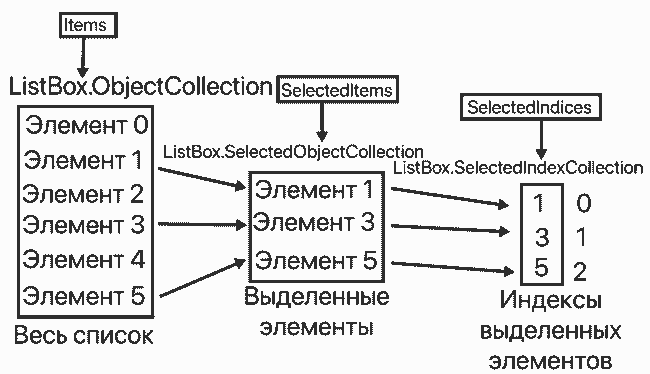

Рис. 17.5. Три коллекции элемента управления ListBox

__Пример__. В следующем коде в обработчике события `button1_Click` выбирается три элемента из списка с помошью метода `SetSelected`. Для списка устанавливается множественный выбор. Затем отображаются значения второго элемента из коллекций `SelectedItems` и `SelectedIndices` (см, рис. 17.3, левый список).

    private void button1_Click(object sender, EventArgs e)
    {
        listBox1.SelectionMode = SelectionMode.MultiExtended;
        listBox1.SetSelected(1, true);
        listBox1.SetSelected(3, true);
        listBox1.SetSelected(5, true);
        label1.Text = listBox1.SelectedItems[1].ToString();
        label2.Text = listBox1.SelectedIndices[1].ToString();
    }

Метод `ListBox.SetSelected` выделяет указанный элемент в `ListBox` или снимает с него выделение. С помощью этого свойства можно выделять несколько элементов в `ListBox` с множественным выбором. Если для списка с множественным выбором использовать свойства `Text`, `SelectedItem` или `SelectedIndex`, то они будут использовать только первый элемент списка.

Страница 157

------------

__Отдельный вопрос__ - как добавить в простой список новый  элемент во время выполнения программы с помощью интерфейса пользователя? Поскольку простой список не имеет своего текстового поля, то такое поле вместе с соответствующей кнопкой надо создать. Для удаления выбранного элемента пользователем также необходимо предусмотреть кнопку или обработку нажатия клавиши `Del`. Иногда для выполнения этих функций можно создать отдельную форму. В отличие от добавления новой строки, для удаления элемента, являющегося объектом, никаких затруднений нет. Для этого надо определить индекс удаляемой строки, и по этому номеру удалить элемент. __Пример__. В приведенном коде, после удаления элемента, выделяется следующий элемент.

    private void button2_Click(obiect sender, EventArgs e)
    {
        if (listBox2.Text != String.Empty)
        {
            int i = listBox2.SelectedIndex;
            listBox2.Items.RemoveAt(i);
            if (i < listBox2.Items.Count)
            { listBox2.SelectedIndex = i;}
        }
    }

Страница 158

-------

В результате удаления элемента, как правило, происходит событие SelectedIndexChanged. При удалении последнего элемента обработчик этого события может выдать ошибку, так как текущий индекс будет равен - 1, и выделенный элемент будет отсутствовать. Чтобы избежать ошибки, вставьте проверку на отрицательное значение индекса. __Пример__.

    private void listBox2_SelectedIndexChanged(object sender, EventArgs e)
    {
        if (listBox2.SelectedIndex != -1)
        {
            label1.Text = listBox2.Text;
            label2.Text = ((Student)listBox2.SelectedItem).Name;
        }
    }
    
# 17.3. Элемент управления ComboBox
Элемент управления comboBox представляет собои комбинацию текстового поля и простого списка. Причем по умолчанию (свойство __DropDownStyle__ равно __DropDown__) отображается только текстовое поле. Такое компактное представление комбинированного списка делает его популярным элементом управления. Благодаря таким особенностям комбинированный список часто называют полем с выпадающим списком. По щелчку кнопки со стрелкой список раскрывается. Щелчком мыши по строке соответствующий элемент становится выбранным, строка выделяется цветом и отображается в текстовом поле, после чего список закрывается (см. рис. 17.1 и 17.2). Благодаря отображению текущего значения в текстовом поле списка, пользователь всегда видит выбранную строку. Кроме того, пользователь может вводить в текстовое поле как существующие, так и новые значения. (Исключение составляет случай, когда свойство DropDownStyle имеет значение DropDownList и ввод запрещен.)

Страница 159

--------

Новое значение может быть добавлено в коллекцию, если это предусмотрено разработчиком. Собственно говоря, возможность вводить в текстовое поле комбинированного списка новые значения, не ограничивая выбор пользователя, и огличает комбинированный список от простого. Комбинированный список имеет три режима отображения, определяемые свойством `DropDownStyle`, которому можно присвоить одно из трех значений перечисления `ComboBoxStyle`:

- __DropDown__ — указывает, что список отображается при нажатии кнопки "стрелка вниз", а текстовая часть является редактируемой (см. рис. 17.6, слева). Это значит, что пользователь может ввести любое значение и он не ограничен выбором из существующих значений списка. Этот стиль используется по умолчанию. В учебнике предпочтение будет отдано этому режиму.
- __DropDownList__ - указывает, что список отображается при нажатии кнопки "стрелка вниз", а текстовая часть является нередактируемой (см. рис. 17.6, в центре). Это означает, что пользователь не может ввести новое значение. Строку можно выбрать мышкой (клавиатурой), при этом ускорить поиск строки можно путем ввода первой буквы. Текстовое поле такого элемента управления отображается серым цветом.
- __Simple__ — указывает, что список всегда раскрыт, а текстовая часть является редактируемой (см. рис. 17.6, справа). Такой список занимает почти столько же места, как и список `ListBox`. Пользователь может ввести любое значение и не ограничен выбором из существующих значений списка.

Примечание: когда Вы помещаете раскрытый список на форму, не забудьте растянуть его по вертикали иначе списка Вы не увидите.


Страница 160

------

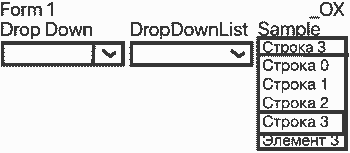

Рис. 17.6. Три режима отображения `ComboBox`

Свойство `ComboBox.AutoCompleteMode`, применяемое совместно со свойством `AutoCompleteSource`, возвращает или задаст параметр, который управляет выполнением автоматического заполнения для текстового поля `ComboBox`. __Чтобы отобразить список__, в который нельзя добавить новые значения, используя текстовое поле списка, воспользуйтесь элементом управления `ListBox` или свойством `DropDownStyle` со значением `ComboBoxStyle.DropDownList`. __Поскольку текстовое поле__ комбинированного списка позволяет вводить новые значения (для скалярных данных), то разработчик должен предусмотреть соответствующий интерфейс пользователя. Например, добавить новый элемент через текстовое поле можно по специальной кнопке Button, по клавише Enter, по факту потери списком фокуса и т.д. Для удаления текущего элемента также можно использовать отдельную кнопку или предусмотреть удаление по клавише Delete. Рассмотрим эти варианты.

Страница 161

-------

# Добавление новых строк
Когда список содержит коллекцию объектов, имеющих носколько открытых свойств (подей), для добавления нового обьскта его необходимо создать. Если объект большой, эту работу проще всего выполнить в отдельном окне. Если одного значения текстового поля комбинированного списка достаточно для создания элемента коллекции `ComboBox`, то для добавления в список элемента можно использовать один из приведенных ниже примеров. __Пример__. Добавление в список новой строки, введенной в текстовое поле `ComboBox` в обработчике события `Leave`. Это событис происходит при потере элементом фокуса ввода.

    private void comboBox1_Leave(object sender, EventArgs e)
    {
        if (comboBox1.Text | = String.Empty)
        {
            if (comboBox1.FindStringExact(comboBox1.Text) == -1)
            {
                comboBox1.Items.Add(comboBox1.Text);
            }
        }
    }


В обработчике осуществляется поиск строки в списке, и если строка не найдена, значит это новая строка, и она добавляется в список. Добавленная строка становится текущей. Для поиска строки используется метод __FindStringExact__, возвращающий индекс строки списка, полностью совпадающей со строкой, заданной в методе. Метод не учитывает регистр! Иногда может быть полезен и метод `FindString`, который ищет вхождение подстроки. Метод возвращает индекс строки списка, в которой будет найдена заданная в методе подстрока (поиск вхождения). Метод не учитывает регистр. Оба метода возвращают значение -1, если строка или позстрока не найдена, или значение 0, если исходная строка пустая `(Empty)`. __Пример__. Добавим в список новую строку по кнопке `Button`. Рекомендуется создать кнопку с текстом "+".

    private void button1_Click (object sender, EventArgs e)
    {
        //...
        // Те же строки, что и в предыдущем примере.
    }

Страница 162

---------

__Пример__. Добавление в список новой строки, введенной в текстовое поле `ComboBox`, по клавише `Enter`. Чтобы отреагировать на эту клавишу, необходимо обработать событие `KeyDown`. Это событие происходит при нажатии любой клавиши, сели текстовое поле комбинированного списка имеет фокус ввода. В представленном ниже обработчике выполняется проверка нажатой клавиши и, если это Enter, выполняется добавление значения.

    private void comboBox1_KeyDown(object sender, KeyEventArgs e)
    {
        if (comboBox1.Text != String.Empty)
            if (e.KeyCode == Keys.Enter)
                if (comboBox1.FindStringExact(comboBox1.Text) = = -1)
                    comboBox1.Items.Add(comboBox1.Text);
    }



# Удаление текущего элемента
Ниже приведены универсальные алгоритмы удаления эле ментов. Эти алгоритмы пригодны как для списков с простыми значениями, так и для списков с объектами, имеющими несколько открытых свойств (полей). __Пример__. Удаление выбранного элемента клавишей `Delete` в бработчике события `KeyDown`.

    private void comboBox1_KeyDown(object sender, KeyEventArgs e)
    { 
        int i = comboBox1.SelectedIndex;
        if (i > -1 && e. KeyCode = = Keys.Delete)       
            comboBox1.Items.RemoveAt(i);
    }

__Пример__. Удаление выбранной строки по кнопке Button. Peкомендуется создать кнопку с текстом "_".

    private void button 1_Click object sender, EventArgs e)
    { 
        int i = comboBox1.SelectedIndex;
        if (i > -1) 
            comboBox1.Items.RemoveAt(i);
    }

Страница 163

--------

__Пример__. Удаление выбранной строки по кнопке Button с выделением следующей строки. При последовательном удалених
нескольких смежных элементов, пользователь будет вынужде после каждого удаления открывать комбинированный список и выделять очередную строку. Для преодоления этого неудобства разработчику целесообразно добавить программное выделение строки, следующей за удаленной. Когда удаляется последний элемент списка, его строковое представление продолжает отображаться в текстовом поле `ComboBox` поэтому в примере это поле очищается.

    private void button1_Click(object sender, EventArgs e)
    {
        int i = comboBox1.SelectedIndex;
        if (i > -1)
        {
            comboBox1.Items.RemoveAt(i);
            if (i < comboBox1.Items.Count )
            { comboBox1.SelectedIndex = i;}
            else {comboBox1.Text = String.Empty;}
        }
    }

Страница 164

--------

# 17.4. Элемент управления CheckedListBox
Список с флажками (CheckedListBox) — это постоянно раскрытый список ListBox, где слева от каждой строки отображается флажок (см. рис. 17.1, 17.2). Заголовок класса CheckedListBox: `public class CheckedListBox : ListBox`. Как следует из заголовка, элемент управления `CheckedListBox` является расширением элемента управления `ListBox`. Он выполняет практически все функции списка, а кроме того, в нем может отображаться галочка рядом со строкой списка. Другое различие между этими элементами управления заключается в том, что в списках с отмеченными элементами можно выделить только один элемент или не выделить ни одного. Установить или сбросить флажок можно только у выбранного (выделенного) элемента. Чтобы установить или сбросить флажок, можно использовать также двойной щелчок мышки на невыделенном элементе. Элемент с установленным флажком называется отмеченным. Текущее выделение элемента снимается, когда выделяется другой элемент, однако это не изменяет состояние флажка. В списке могут одновременно находиться несколько элементов с установленными флажками и только один с выделенным текстом. На рис. 17.1 показаны два элемента с отмеченными флажками и один элемент выбранный. Если выбранный элемент с неотмеченным флажком щелкнуть, то флажок будет установлен (см. рис. 17.2). Если флажок у выбранного элемента был ранее установлен, то он будет сброшен. Поскольку элемент управления `CheckedListBox` наследует члены класса `ListBox`, то для работы с коллекцией всех элементов `(CheckedListBox.ObjectCollection)` используются те же средства, что и для элемента управления `ListBox`: `Items`, `Text`, `SelectedIndex`, `SelectedItem`, `Sorted`, `UseTabStops` и др.

Страница 165

-------

Каждый элемент списка `CheckedListBox` независимо от того, выделен он или нет, может иметь одно из трех состояний, определяемых флажком. Эти значения являются членами перечислении `CheckState`: __во первых__, __Unchecked__ — флажок снят (не отмечен); __во вторых__, __Checked__ — флажок установлен (отмечен); __в третьих__, __Indeterminate__ - флажок находится в неопределенном состоянии. Такой флажок обычно затенён (недоступен). По умолчанию это значение не используется. Установить это значение можно только в коде, напимер, с помощью метода SetitemCheckState. Отмеченные элементы (включая элементы в неопределенном состоянии) образуют коллекцию `CheckedListBox`. `CheckedItemCollection`, а индексы этих элементов — коллекцию `CheckedListBox.CheckedIndexCollection`. Эти коллекции доступны через свойства `CheckedItems` и `CheckedIndices` соответственно.



# Работаем с коллекцией отмеченных элементов
Заметим, свойства `SelectedItem` и `SelectedIndex` не определяот помеченный элемент: они определяют выделеный элемент. Приведем список членов класса `CheckedListBox`, не совпадающих с унаследованными членами класса `ListBox` и используемых ниже для работы с отмеченными элементами. __Методы__: Если Вы не собираетесь использовать состояние Indeterminate, то Вам могут пригодиться следующие методы: __GetItemChecked__ - возвращает значение, указывающее, отмечен ли заданный элемент. __SetItemChecked__ — устанавливает для состояния `CheckState` элемента с заданным индексом значение `Checked` или `Unchecked` Параметры метода: индекс элемента и значение `true`, чтобы задать элемент как отмеченный `(Checked)`; в противном случае значение `false`. Если Вы собираетесь использовать состояние `Indeterminate`, в Вы, наверняка, будете использовать следующие методы: __GetItemCheckState__ - возвращает значение, указывающее состояние проверки текущего элемента. __SetItemCheckState__ — задает состояние проверки элемента с указанным индексом. Параметры метода: индекс элемента, для которого требуется задать его состояние, и одно из значений перечисления `CheckState`. Метод `SetitemCheckState` вызывает событис `ItemCheck`.

Страница 166

------

__Свойства__: __CheckedIndices__ — коллекция отмеченных индексов в данном элементе управления `CheckedListBox`. __CheckedItems__ - коллекция отмеченных элементов в данном злементе управления `CheckedListBox`. __CheckOnClick__ — получает или задает значение `(true/false)`, указывающее, следует ли переключить флажок, когда выбирается злемент. По умолчанию — не следует `(false)`. __События__: __SelectedIndexChanged__ - происходит при щелчке мыши по любой части строки списка, включая флажок. __ItemCheck__ — происходит при изменении состояния флажка. Сначала происходит событие, а затем отображается новое состоявле флажка. Обработчику события передается параметр е с двумя важными свойствами: __Index__ — индекс элемента, флажок которого меняет состояние; __NewValue__ — новое состояние флажка (`Checked`/`Unchecked`), которое будет установлено вместо текущего. Доступ к коллекции отмеченных элементов можно получить с вомощью свойства `CheckedItems`. Также можно перебрать элементы исходного списка с помощью метода `GetItemChecked`, чтобы определить какие элементы помечены. Метод `GetltemChecked` принимает номер элемента в качестве аргумента и возвращает звачение `true` или `false`.

Страница 167

-----------

__Пример__. Вывод всех помеченных элементов. В примере осуществляется перебор элементов коллекции `Checkeditems` и вывод сообщения в формате: "Помеченный элемент: Строка 3" ...

    private void button1_Click(object sender, EventArgs e)
    {
        string s = "";
        foreach (var v in checkedListBox1.CheckedItems)
            s += "\пПомеченный элемент: " + v;
        MessageBox.Show(s);
    }

Если разработчик хочет в цикле поменять состояние какого либо флажка, то вместо `foreach` необходимо использовать цикл `for`:

    for (int i = 0; i < checkedListBox1.CheckedItems.Count; i++)
        s += "\пПомеченный элемент: " + checkedListBox1.CheckedItems[i];


__Пример__. Вывод всех помеченных элементов. Этот пример отличается от предыдущего тем, что здесь осуществляется перебор всех элементов исходной коллекции `Items` и вывод помеченны элементов. Для определения состояния флажка элемента испотьзуется метод `GetItemChecked`.

    private void button1_Click(object sender, EventArgs e)
    {
        string s = "';
        for (int i = 0; i < checkedListBox1.Items.Count; i++)
            if (checkedListBox1.GetItemChecked(i) == true)
                s += "\пПомеченный элемент: " + checkedListBox1.Items[il;
        MessageBox.Show(s); 
    }

Страница 168

--------

__Пример__. В приведенном обработчике события `ItemCheck` отслеживается переход всех флажков в состояние `Unchecked`. Если отмеченных флажков нет, то кнопка button1 (см. предыдущий пример) становится неактивной. Как только появится первый отмеченный флажок, кнопка снова станет активной. Для решения этой задачи проверяется, станет ли текущий элемент неотмеченным. Если при этом в списке отмеченных элементов находится всего один элемент, то после выхода из обработчика события `ItemCheck` список станет пустым. Для пустого списка кнопка `button1` становится неактивной.
    
    void checkedListBox1_ItemCheck(object sender, ItemCheckEventArgs e)
    {
        if (e.NewValue == CheckState.Unchecked)
            if (checkedListBox1.CheckedItems.Count == 1)
            { button1. Enabled = false; }
            else { button1. Enabled = true; }
    }

__Пример__. Программное изменение состояния флажков четных элементов. Для изменения используется метод `SetItemChecked`.

    private void button1_Click(object sender, EventArgs e)
    {
        for (int i = 0; i < checkedListBox1.Items.Count; i += 2)
        { checkedListBox1.SetItemChecked(i, true); } 
    }
    
Страница 169

-------

# 17.5. Изменение объектов коллекции
Если коллекция списочного элемента управления состоит из значимых типов данных, то их изменение сразу же отображается на экране. Например, после выполнения следующего оператора `listBox1.Items[11 = 777;` на экране появится новое значение. Однако, если коллекцией списочного элемента управления являются объекты, а точнее, ссылки на объекты, то при изменении какого-либо объекта на экране продолжает отображаться старое значение и перерисовать его не удается, даже если использовать методы `Refresh` или `Update`. Рассмотрим это явление на примере. Пусть у нас имеется простейший класс: 
    
    class MyClass
    {
        public int P1 { get; set; }
        public int P2 { get; set; }
    }

В обработчике `Form1_Load` мы заполняем элемент управления `listBox` ссылками на объекты класса `MyClass`:

    private void Form1_Load(object sender, EventArgs e)
    {
        listBox1.Items.Add(new MyClass { P1 = 0, P2 = 90 });
        listBox1.Items.Add(new MyClass { P1 = 1, P2 = 91 });
        listBox1.Items.Add(new MyClass { P1 = 2, P2 = 92 });
        listBox1.Items.Add(new MyClass { P1 = 3, P2 = 93 3);
        listBox1.Items.Add(new MyClass { P1 = 4, P2 = 94 });
        listBox1.DisplayMember = "P1";
        listBox1.SelectedIndex = 0;
    }

Страница 170

-----------

Еели мы изменим поле какого-либо объекта, например второго (индекс= 1), следующим образом: `((MyClass)listBox1.Items[1]).P1 = 555;` то в злементе управления по-прежнему будет отображаться значение 1. Но это противоречие как раз объяснимо: мы меняем поле в неподконтрольном элементу управления объекте. Необъяснимым является, почему методы `listBox1.Refresh() и listBox1.Update()` не обновляют вывод, хотя они предназначены для перерисовки элемента управления. Рекомендуется из этой ситуации выходить следующим образом: сначала удаляем объект из списка, а затем вставляем измененный объект на место удаленного:

    private void Изменить_Click(object sender, EventArgs e)
    {
        listBox1.Items.RemoveAt(1);
        listBox1.Items.Insert(1, new MyClass { P1 = 777, P2 = 91 });
    }


Другой способ: после всех изменений заново определить свойство `DisplayMember`:

    ((MyClass)listBox1.Items[1]).P1 = 555;
    comboBox1.DisplayMember = null;
    comboBox1.DisplayMember = "P1";

Страница 171

--------

# 17.6. Задания для самостоятельной работы
__Задача 1__. Разработать Windows-приложение, в котором создать класс Book с полями: название книги, автор, жанр, год издания. Создать библиотеку книг (`List<Book>`) и отобразить ее в табличном виде: в многострочном `TextBox`; в списке `ListBox`; Название книги должно вводиться в `TextBox`, автор выбираться из `ComboBox`, жанр задаваться переключателями `RadioButton`, а год издания вводиться в `TextBox`. Предусмотреть возможность добавления и удаления авторов.

__Задача 2__. Разработать Windows-приложение, в котором создать класс `Student`. Поля класса: фамилия, средний балл, характеристика успеваемости (отстающий, посредственный, хорошист, отличник, несданные предметы: математика, информатика, экономика). Для создания объектов использовать элементы управления: для отображения фамилий — `ComboBox`, для отображения несданных предметов — `CheckedListBox`, для отображения характеристики успеваемости — `RadioButton`, средниего балла - `TextBox`. После выборки значений из перечисленных элементов управления по кнопке Button включить студента в список `List<Student>` и отобразить список студентов в `ListBox`.

__Задача 3__. Разработать Windows-приложение для предметной области «Коммунальные платежи». В форме обязательно использовать следующие элементы управления: списки `ListBox`; комбинированный список `ComboBox` с возможностью добавления и удаления абонентов; переключатели; рамки; надписи; кнопки.

Страница 172

-----

Разработать базовый абстрактный класс «Платеж» и производные классы «Электро» и "Газ". Базовый класс «Платеж» должен иметь следующие члены: __во первых__, поле (свойство) фамилия плательщика; __во вторых__, абстрактные методы: вычисление суммы оплаты; формирование сводной информации в виде строки по одному платежу. Производный класс «Электро», описывающий платеж за электроэнергию, должен иметь следующие члены: поля (свойства): __во первых__, текущее показание счетчика; __во вторых__, предыдущее показание счетчика; __в третьих__, тариф (стоимость одного киловатта). __Производный класс__ «Газ», описывающий платеж за газоснабжение, должен иметь следующие члены: поля (свойства): количество проживающих человек; тариф (стоимость оплаты за одного проживающего). Абстрактные методы базового класса в производных классах должны быть реализованы. Все платежи должны накапливаться в базе, которая должна имитироваться динамическим массивом `List<Платеж>`, Занесение платежа в базу выполняется пользователем по кнопке. Вместо списка `List<Платеж>` для хранения платежей можно использовать непосредственно списки `ListBox`. Количество платежей заранее неизвестно. Пользователю должны быть предоставлены следующие функ циональные возможности: __во первых__, занесение в базу платежа; __во вторых__, получение справки обо всех платежах за электроэнергию; __в треитьих__, получение справки обо всех платежах за газоснабжение; __в четвертых__, вычисление итоговой суммы по всем платежам.

Страница 173

--------

Текстовые поля, не относящиеся к текущему виду энергии, Должны быть недоступны. Примерный вид формы показан на рис. 17.7. Внешний вид формы не является примером для подражания, он может быть улучшен. Например, информацию в списки желательно выводить в табличном виде с выровненными по вертикали колонками.

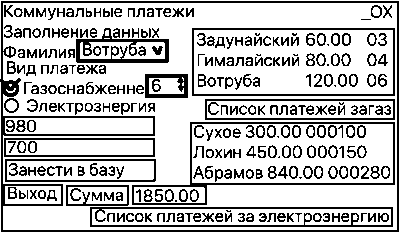

Рис. 17.7. Окно программы

Страница 174

---------

#  18. ПРИВЯЗКА К ИСТОЧНИКУДАННЫХ
### 18.1. Общие сведения
Рассматривая ранее списочные элементы управления, мы не раз отмечали, что эти элементы могут заполняться данными из внешнего источника. Это заполнение можно выполнить вручную, с помощью циклов. Например, пусть в нашем распоряжении имеется список list типа List<string> и мы хотим отобразить строки этого списка в элементе управления comboBox1, для чего разрабатываем следующий метод:

    

    //--Создать список ComboBox--
    private void CreateComboBoxList<string> list)
    {
        comboBox1.Items.Clear();
        foreach (var g in list)
            if (IcomboBox1.Items.Contains(g))
                comboBox1.Items.Add(g);
    }

Метод `CreateComboBox` получает в качестве аргумента список и записывает его уникальные строки в элемент управления `comboBox1`. Метод `Contains` определяет, входит ли указанный элемент в данную коллекцию, при этом метод учитывает регистр, то ость строки "Жасмин" и "жасмин" — это разные строки.

Страница 175

----------

__Примечание__. В данном учебнике, в примерах, часто используются имена элементов управления, генерируемые по умолчанию средой разработки VisualStudio. Эти имена образуются от типа элемента управления с добавлением порядкового номера элемента в форме. Например, элементы упразления `label1` и `label2` — это первый и, соответстенно, второй объекты типа `Label`. Аналогично: `textBox1` и `textBox2` — это первый и, соответственно, второй объекты типа `TextBox`. То же правило применяется и к другим элементам управления. Используя такие имена объектов, мы будем считать, что читатель понимает, от какого класса они созданы. Следует отметить, что если какой-либо один или оба списка будут изменяться в процессе выполнения программы, то разреботчик должен решить задачу синхронизации списков: изменится один список, требуется изменить и другой. Поэтому использование внешних данных для разработчика представляет определенную трудность. Но, к счастью, система программирования для решения этой задачи предоставляет специальный механизм, позволяющий выполнить так называемую привязку элемента управления к источнику данных, используя специальные свойства элемента управления. При этом разработчик освобождается от решения вопросов загрузки данных и их синхронизации. Под привязкой визуального элемента управления к источнику данных понимают процесс, при котором элемент управления выбирает данные из указанного для него источника. При этом исходная коллекция элементов перед привязкой очищается.

Механизм привязки устанавливает взаимосвязь между этементом управления и данными его источника, при этом изменение данных в источнике приводит к изменению их отображения в элементе управления. Это в идеале. На практике для многих поточников надо использовать специальный метод, который приводит к обновлению привязки и отображению элемента управления. В зависимости от того, каким является элемент управления — простым (не содержащим коллекции элементов) или списочным (содержащим коллекции элементов), — используются разные механизмы привязки. К простым элементам управления относятся `TextBox`, `Label` и др., к списочным `ListBox`, `ComboBox`, `DataGridView` и др. Для привязки простых элементов управления используют простую привязку к одиночному значению, а списочных — сложную привязку к списку значений. Для простой привязки используется класе Binding, а для сложной — BindingSource. Эти классы исследуют источник данных, причем во внимание принимаются только открытые свойства. Открытые поля игнорируются. Поскольку для реализации простой привязки рекомендуется использовать класс BindingSource, рассмотрим сначала сложную привязку как наиболее востребованную. Особое место в технологии привязок занимает окно «Источники данных». В этом окне отображаются источники данных в проекте, такие как базы данных, веб-службы и объекты. Можно создавать элементы управления с привязкой к данным, перетаскивая элементы из окна «Источники данных» на форму. Можно также осуществить привязку существующих элементов управления к данным путем перетаскивания объектов из окна источников данных на существующие элементы управления.

Страница 176

--------

# 18.2. Сложная привязка ОСНОВНЫЕ СВЕДЕНИЯ
Привязка называется «сложной» не потому что она является сложной для использования разработчиком (как раз здесь всё просто), а потому что источник данных является сложной, многострочной структурой данных. Чаще всего — это список (массив) объектов, которые заданным образом необходимо отобразить в многострочном элементе управления. К элементам управления, поддерживающим сложную привязку к источнику, относятся `ListBox`, `ComboBox`, `DataGridView`, `DataView`, `BindingSource` и др. Для реализации привязки элементов управления к источнику данных эти элементы предоставляют свойство DataSource, которое возвращает или задаст источник данных для элемента упранления (компонента).

Страница 177

------------

### Примечание
Поскольку независимо от списочного элемента управления для привязки используются одни к те же свойства, все примеры будут приведены для злемента управления `listBox` типа `ListBox` В качестве источника данных будем расси тривать список `list` типа `List«<MyClass>`, созер жащий обєкты следующего класса:

    class MyClass
    {
        public int P1 ( get; set;
        public int P2 ( get; set; )
    }

Используются два спосова сложной привязки элемента управления - нспосредственно к источнику данных и через посредника. 

__Пример__. Привязать `listBox1` непосредственно к списку объектов list типа List<T>. `listBox1.DataSource = list;` При использовании привязки элемента управления к источнику данных возникает ряд проблем. Главная из них состоит в следующем: как известно, источник данных в процессе работы программы чаще всего претерпевает изменения: добавляются новые объекты, какис-то удаляются, свойства объектов получают новые значения. Если источник изменился, то необходимо, чтобы привязанный к этому источнику элемент управления был об этом извещен. Тогда элемент управления перерисует отображение объектов на экране. Так должно быть. Однако на практике, многие источники данных массивы, списки `List<T>` и др., никаких уведомлений не посылают. К числу источников данных, которые уведомляют привязанные элементы управления, относятся `BindingList`. `BindingSource` и некоторые другие.

Страница 178
    
--------

Кроме того, источники данных могут иметь разную природу и отличаться друг от друга. Не со всеми источниками данных одинаково успешно может взаимодействовать элемент управления. Поэтому для решения этой проблемы был разработан компонент `BindingSource`, который можно использовать в качестве универсального связующего средства между элементами управления в форме и источником данных (см. рис. 18.1). То есть `BindingSource` является посредником, который берет на себя функции детальново исследования источника данных и уведомления привязанного к нему элемента управления о необходимости перерисовать список. Класс `BindingSource` иногда называют соединителем.

- Элемент управления <-> BindingSource <-> Источник данных

 Рис. 18.1. Использование посредника в сложной привязке

При использовании соединителя элемент управления с помощью свойства `DataSource` привязывается не к источнику данных, а к компоненту `BindingSource`, который для элемента управления становится источником данных. Компонент `BindingSource` (объект `bindingSource1`), в свою очередь, привязывается к источнику данных с помощью своего свойства `DataSource`.

__Пример__. Использование соединителя для привязки элемента управления `listBox1` к списку `list`.

    bindingSource1.DataSource = list.
    listBox1.DataSource = bindingSource1;

# Источники данных
В качестве источников данных для сложной привязки можно использовать массивы `Агау`, коллекции `ArrayList`, `List<T>` и `BindingList<>`, таблицы `DataTable` и представления `DataView ADO .NET` и многие другие. Можно не перечислять все источники, а ограничиться следующим комментарием: при сложной привязке обычно требуется, чтобы объект поддерживал интерфейс `IList` или `IListSource`. Так как эти интерфейсы определяют список объектов, организованных в коллекцию, то сложная привязка данных также называется привязкой на основе списка.

Страница 179

---------- 

Если при привязке используется компонент `BindingSource` можно выполнить привязку к объекту, поддерживающему так-же интерфейс `IEnumerable`. Таким объектом, например, является последовательность, возвращаемая `LINQ`-запросом. (Присвятой LINQ To Objects) Компонент `BindingSource` копирует все элементы `IEnumerable` в отдельный список `List`, предназначенный исключительно для привязки. Все коллекции и массивы (а также класс `CollectionBase`) peaлизуют интерфейс `IList`. Эти классы представляют собой индексированные списки объектов типа `Object`. Такие элементы управления называют объектами на основе списков. Обратите внимание, какое количество интерфейсов наследует класс `List<T>`:

    public class List<T> : IList
        , IList<T>
        , ICollection, ICollection<T>
        , IEnumerable, IEnumerable<T>

Как видите, если есть универсальный интерфейс, то должен быть и неуниверсальный. Класс, реализующий интерфейс `IListSource`, обеспечивает привязку на основе списка для объектов, не являющихся списками. Метод `GetList` объекта `IListSource` используется, чтобы возвратить связываемый список из объекта, не наследующего от списка `IList`. Объект `IListSource` используется классом `DataSet`. Компонент `BindingSource` расширяет перечень доступных для привязки источников данных. К примеру, такие элементы управления, как `DataGridView` и `ComboBox`, не поддерживают приваку непосредственно к источникам данных `IEnumerable`, однако такую привязку можно осуществить посредством компонсита `Binding Source`. В этом случае компонент `BindingSource` преобрадует источник данных в интерфейс `IList`. Можно создать источники данных из баз данных, служб или объектов. Можно перетащить элементы из окна «Источник данных» в рабочую область конструирования проекта для сон дания элемента управления с привязкой данных к свойствам выбранного объекта. Список значений в качестве источника данных можно создать с помощью запроса Linq.

Страница 180

------------------

# Отображаемое и возвращаемое свойства источника
У элементов управления ListBox и ComboBox есть несколько полезных свойств, часто используемых совместно с привязкой:
- __DisplayMember__ — определяет свойство источника данных, значение которого будет отображаться в элементе управления.
- __ValueMember__ - возвращает или задает свойство источника данных, значение которого извлекается из текущего объекта.
- __SelectedValue__ — возвращает или задает значение свойства, определенного свойством ValueMember.

У сетки DateGridView и компонента BindingSource, перечисленных свойств нет, но есть свойство DataMember, которое указывает подсписок или таблицу источника данных. __Если объекты__ источника данных имеют несколько открытых свойств, то требуется уточнение — какое свойство источника следует отображать на экране в списке ListBox или ComboBox, а какое свойство будет возвращать значения. Это уточнение делается с помощью таких свойств списка, как DisplayMember и (соответственно) ValueMember. Значением каждого из этих свойств является имя свойства источника, представленное в виде строки, например, для свойств класса, приведенного выше, конкретизация свойств может выглядеть следующим образом:

    listBox1.DisplayMember = "P1";
    listBox1.ValueMember = "P2";

Следует отметить, значение свойства P2 выбирается из объекта, соответствующего выбранной, то есть текущей строке списочного элемента управления.

Страница 181

---------

# Члены класса BindingSource и область их применения
Приведем описание некоторых членов класса BindingSource. В описании используется термин «базовый источник данных», Этим источником является список объектов, к которому привязан BindingSource.

### Свойства класса BindingSource:
- __this[индекс]__ - индексатор. Возвращает или задает элемент базового списка по указанному индексу.
- __List__ — получает базовый список, к которому привязан соединитель.
- __Count__ — получает общее число элементов в базовом списке.
- __Current__ — получает текущий элемент в базовом списке.
- __DataMember__ — возвращает или задает список в источнике данных, к которому в настоящий момент привязан соединитель.
- __DataSource__ — возвращает или задает источник данных, к которому привязан соединитель.
- __Position__ - возвращает или задает индекс текущего элемента в базовом списке.

Свойством по умолчанию в классе `BindingSource` является свойство `DataSource`. Методы `BindingSource` для работы со списком источника данных:
- __Add__ — добавляет существующий элемент в базовый список.
- __AddNew__ — создает новый объект с помощью конструктора по умолчанию и добавляет его в базовый список.
- __ApplySort__ — сортирует источник данных, используя задавные описания сортировки.
- __CancelEdit__ - отменяет текущую операцию редактирования
- __Clear__ — удаляет все элементы из базового списка, представ ленного свойством `List`, и устанавливает свойство `Count` в значение О.
- __СоруТо__ — копирует содержимое списка, представленно свойством List, в указанный массив, начиная с указанного индекса. Этот метод служит для объединения элементов из нескольких неточников в один массив.
- __EndEdit__ - применяет незавершенные изменения к базовому неточнику данных.
- __Fin__ — возвращает индекс элемента в базовом списке, имеющего заданное имя свойства и значение.
- __IndexOf__ - осуществляет поиск указанного объекта и возвращаст индекс первого вхождения в пределах списка.
- __Insert__ — вставляет элемент в список по указанному индексу.
- __Remove__ — удаляет заданный элемент из базового списка.

Страница 182

----------

- __RemoveAt__ — удаляет элемент по указанному индексу из базового списка.
- __RemoveCurrent__ - удаляет текущий элемент из базового списка.
- __RemoveFilter__ - удаляет фильтр, сопоставленный с компонентом `BindingSource`.
- __RemoveSort__ — удаляет сортировку, сопоставленную с компонентом `BindingSource`.
- __ResetBindings__ — вызывает в элементе управления, привязанном к компоненту `BindingSource`, повторное считывание всех элементов списка и обновление их отображаемых значений.
- __ResetCurrentItem__ — вызывает в элементе управления, привязанном к компоненту `BindingSource`, повторное считывание выбранного элемента списка и обновление его отображаемого значения.
- __ResetItem__ — вызывает в элементе управления, привязанном к компоненту `BindingSource`, повторное считывание элемента списка по указанному индексу и обновление его отображаемого значения.
- __ResumeBinding__ - вызывает привязку данных.

В классе `BindingSource` есть несколько событий. Событием по умолчанию является `CurrentChanged`. Если элемент управления `listBox1` привязан к соединителю `bindingSource1`, который в свою очередь привязан к списку `list` типа `List<T>` или `BindingList<T>` , то выполняются следующие за висимости:

    bindingSource1.DataSource эквивалентно list
    bindingSource1.List эквивалентно list
    bindingSource1.DataSource эквивалентно bindingSource1.List
    listBox1.Items[1] эквивалентно list[1]
    listBox1.Items не эквивалентно list

То есть соединитель в своих свойствах List и DataSource хранит ссылку непосредственно на источник данных. Списковый элемент управления также хранит ссылки на объекты источника.

Страница 183

-------------

# Примеры сложной привязки
Приведем несколько примеров сложной привязки, отличающихся источниками данных. Предполагается, что объект `bindingSource1` типа `BindingSource` создан автоматически при перетаскивании компонента на форму.

__Пример__. В приведенном фрагменте программы осуществляется создание списка `list` объектов `MyClass`. Далее выполняется сложная привязка элемента управления `ListBox` к списку `list`. Отображаемым в `ListBox` свойством источника определено свойство `Р1`, а возвращающим значение — `P2`.

    List<MyClass> list;
    private void Form1_Load(object sender, EventArgs e)
    {
        list = new List<MyClass>();
        list.Add(new MyClass { P1 = 0, P2 = 90 });
        list.Add (new MyClass { P1 = 1, P2 = 91 });
        list. Add(new MyClass { P1 = 2, P2 = 92 }):
        list.Add(new MyClass { P1 = 3, P2 = 93 });
        list.Add(new MyClass { P1 = 4, P2 = 94 });
        bindingSource1.DataSource = list;
        listBox1.DataSource = bindingSource1;
        listBox1.DisplayMember = "P1";
        listBox1.ValueMember = "P2";
    }

Страница 184

---------

Для сложных источников данных, таких как таблицы базы данных или списки списков, можно дополнительно указать в свойстве `DataMember` определенный столбец в таблице или список в источнике данных. Затем выполнить привязку элемента управления к компоненту `BindingSource`.

__Пример__. Сложная привязка ComboBox к колонке «ИмяПродукта» таблицы «Продукты».

    // Привяжем объект bindingSource1 к таблице "Продукты"
    // базы данных MyDataSet.
    bindingSource1.DataSource = MyDataSet;
    // Выбираем конкретную таблицу.
    // bindingSource1.DataMember = "Продукты";
    // Так как ComboBox отображает в каждой строке
    // только одно значение, то привяжем ComboBox к bindingSource1
    // и укажем столбец "ИмяПродукта" для вывода в список
    comboBox1.DataSource = bindingSource1;
    comboBox1.DisplayMember = "ИмяПродукта";

Страница 185

---------

__Пример__. Привязка сетки `DataGridView` ко всей таблице «Продукты». Каждая колонка `DataGridView` отображает один столбец таблицы, поэтому `DisplayMember` задавать не нужно.

    bindingSource1.DataSource = MyDataSet;
    bindingSource1.DataMember = "Продукты";
    dataGridView1.DataSource = bindingSource1;

__Пример__. Сложная привязка `ComboBox` к перечислению `SeriesChartType`.

    bindingSource1.DataSource = Enum.GetValues(typeof(SeriesChartType));
    comboBox1.DataSource = bindingSource1;

Особенность привязки к перечислению состоит в том, что, несмотря на то что привязка осуществляется к числовым значениям констант перечисления, отображаются не числа, а имена этих констант. Связано это с тем, что перед отображением числовых значений применяется метод `ToString`, а он возвращает имя константы. Однако свойство `comboBox1.SelectedValue` возвращает числовое значение: `chartType = (SeriesChartType)comboBox1.SelectedValue;`
Если выполнить привязку к массиву имен: `bindingSource1.DataSource = Enum. GetNames(typeof(SeriesChartType));` то свойством SelectedValue будет возвращаться имя.

# Изменение источника данных
Ряд из перечисленных выше методов обеспечивает косвенное обращение компонента BindingSource к источнику данных, например, метод RemoveAt компонента перенаправляется источнику данных. Поэтому источники данных, например List<T>, должны содержать соответствующие методы, что гарантируется унаследованными интерфейсами.
    
__Пример__. В следующих операторах осуществляется добавление нового объекта в базовый список и удаление из этого списка объекта с индексом 0. Метод `Add` соединителя выполняет как минимум две функции: вызывает метод `List<MyClass>.Add` базового списка, используя ссылку на него в свойстве `BindingSource.List`, и уведомляет элемент управления об изменении базового списка: элемент управления будет перерисован.

    bindingSource1.Add(new MyClass { P1 = 555, P2 = 555 });
    bindingSource1.RemoveAt(0);

Таким образом, соединитель BindingSource упрощает взаимодействиие элемента управления с источником данных за счет создания уведомлений об изменении списка источника, который (список) не создает уведомлений. Для решения задач изменения списка источника данных можно использовать методы не соединителя, а самого списка.
    
Страница 186

----------

__Пример__. В следующих строках демонстрируется работа с базовым списком, минуя соединитель. Осуществляется добавление нового объекта и удаление объекта, находящегося на нулевой позиции.

    list.Add(new MyClass { P1 = 66, P2 = 97 });
    list.RemoveAt(0);

__Обратите внимание__: свойство `List` соединителя возвращает ссылку на базовый список, через которую можно получить доступ к членам класса источника данных. К таким членам относятся, например, методы `Add` и `RemoveAt`, использование которых было продемонстрировано в примере.

__Пример__. Ниже приведены операторы, которые вызывают те же методы, что и в предыдущем примере, но через свойство `List` соединителя.

    bindingSource1.List.Add(new MyClass { P1 = 555, P2 = 555 });
    bindingSource1.List.RemoveAt(0);

Если списочный элемент привязан к источнику данных, то нельзя изменять список этого элемента управления (добавлять, удалять, присваивать новое значение). Как уже говорилось, изменять надо источник данных. По этой же причине привязанные элементы управления не выполняют и сортировку своего списка. Чтобы отобразить отсортированные данные в элементе управления, необходимо отсортировать источник данных.

__Примечание__. Данные ограничения не в полной степени справедливы для элемента управления `DataGridView`. К элементу управления `CheckedListBox` невозможно привязать список. Вместо этого для привязки используйте элемент управления `ComboBox` или `ListBox` или выполняйте заполнение списка `CheckedListBox` вручную.

Страница 187

-----------

# ПЕРЕРИСОВКА ЭЛЕМЕНТА УПРАВЛЕНИЯ
Если для изменения базового списка используются методы источника данных, то будет ли перерисован привязанный элемент управления или нет, зависит от источника данных. В приведенных примерах методы источника `List<MyClass>` не уведомляют соединитель о выполненных изменениях. Поэтому типична ситуация, когда список был изменен, а элемент управления продолжает отображать старые значения. __Если для__ изменения источника данных используются метобы класса `BindingSource`, то функцию уведомления элемента управления берет на себя соединитель — элемент будет перерисован. __Другой хороший способ__ — вместо класса `List<T>` использовать обобщенный класс `BindingList<T>`, методы которог уведомляют привязанный элемент управления об изменения своего списка. Класс находится в пространстве имен `System.ComponentModel`. Этот класс представляет собой универсальную версию интерфейса `IBindingList`, который расширяет интерфей `IList`, добавляя свойства, методы и события, необходимые для дву сторонней привязки данных (`BindingSourse - BindingList`). __Класс__ `BindingList<T>` реализует функциональность, близкую к классу `List<T>`, поэтому замена одного имени класса на другой осушествляется без каких-либо проблем. Правда, класс `BindingList<T>` не имеет своего метода сортировки `Sort`, поэтому вместо него нужно использовать метод расширения `OrderBy`. Кроме того, вы можете отказаться от соединителя и привязывать элемент управления непосредственно к коллекции `BindingList<T>`, так как класс `BindingList<T>`, по своей сути, является некоторой комбинацией классов `BindingSource` и `List<T>`. В частности, класс `Binding и List<T>` имеет метод `ResetBindings`, что позволяет обновлять привязку. __До сих пор речь шла об__ использовании методов класса `BindingSourse` или классов `List<T>` и `BindingList<T>`. А что происходит, если изменяется отдельное значение какого-нибудь открытого свойства объекта источника обычным присваиванием. Сразу скажем: как правило, при изменении свойства никаких уведомлений соединителю не посылается. Рассмотрим пример, в котором разными способами извлекается ссылка на объект и одно из свойств этого объекта получает новое значение.

Страница 188

-----------

__Пример__. Ниже приведены три оператора, одинаковым образом изменяющие свойство `Р1` первого объекта списка типа `List<T>` или `BindingList<T>`. Первый оператор использует индексатор списка `list`, второй - индексатор соединителя, возвращающий ссылку на объект, и третий - индексатор свойства `List` соединителя, возвращающего ссылку на список.
1) list[0].P1=77;
2) ((MyClass)bindingSource1[0]).P1 = 77;
3) ((MyClass)bindingSource1.List[0]).P1 = 77;

Никакого уведомления эти строки не создают. Дело в том, что в примере меняется свойство P1 пользовательского класса и при этом на выполнение вызывается не системный метод ( типа `Add`, `Remove` и др.), а аксессор `set` этого свойства. В пользовательском классе `MyClass`, используемом в примерах, в аксессорах `set` механизм извещений не реализован. Так как пользовательские классы, как правило, не содержат код, уведомляющий привязку об изменении значений своих свойств, то рекомендуется после каждого изменения значения свойства обновлять отображение элемента управления. Для обновления привязки и перерисовки элемента управления компонент `BindingSource` содержит методы: `ResetItem`, `ResetCurrentItem` и `ResetBindings`. Эти методы вызывают повторное считывание (одной или всех строк) из источника данных и обновление отображения считанных данных в элементе управления, привязанном к компоненту `BindingSource`. Обновить можно: отдельный элемент с указанным индексом (`Resetitem`); текущий элемент (`ResetCurrentItem`); все элементы (`ResetBindings`). Повторное считывание уведомляет элемент управления о не обходимости обновить отображение (одной или всех строк).

Страница 189

-------------

- __Пример__. Обновим и перерисуем нулевую строку элемента управления. `bindingSource1.ResetItem(0);`
- __Пример__. Обновим и перерисуем все строки элемента управления. `bindingSource1.ResetBindings(false);`

Если вместо вызова метода `bindingSource1.ResetBindings` (или подобного) Вы попытаетесь обновить привязку, повторно присвоив свойству `bindingSource1.DataSource` ссылку на источник данных, то `BindingSource` это проигнорирует, так как ссылка на источник не изменилась. Компонент `BindingSource` автоматически обнаруживает изменения в источнике данных, когда тип, содержащийся в этом источнике, реализует интерфейс `INotifyPropertyChanged` и вызывает события `PropertyChanged` при изменении значения свойства. Это очень удобно, поскольку элементы управления, связанные с компонентом `BindingSource`, будут автоматически обновляться при изменении значений источника данных.

Страница 190

--------------

# Добавление нового объекта в ComboBox
При добавлении нового объекта в список источника данных, привязанный к элементу управления ComboBox, происходит обновление привязки и это приводит к тому, что в текстовом поле `(ComboBox. Text)` элемента управления всегда будет отображаться первый объект списка, а не добавленный. Покажем, как можно решить эту проблему. Ниже приведен обработчик, добавляющий новый объект по клавише `Enter`.

    private void comboBox1_KeyDown(object sender, KeyEventArgs e)
    {
        if (comboBox1. Text ! = String.Empty)
            if (e.KeyCode == Keys. Enter)
                if (comboBox1.FindStringExact(comboBox1.Text) = = -1)
                {
                    list.Add(int.Parse(comboBox1.Text));
                    comboBox1.SelectedIndex = comboBox1.Items.Count - 1;
                }
    }

Поскольку добавленая в список строка является последней, она и выбирается в текстовое поле с помощью свойства `SelectedIndex`.

Страница 191

----------

# РЕЖИМ ВИЗУАЛЬНОЙ ПРИВЯЗКИ
Компонент `BindingSource` находится в окне элементов, поэтому его можно перетащить на форму. При этом автоматически созластся объект, а на панели компонентов отобразится имя этого объекта. Далее Вы можете выполнить привязку соединителя к источнику данных, используя окно свойств. На этом этапе Вы можете привязаться, как правило, только к типу объектов источника данных. Такую привязку рекомендуется выполнять для элемента управления `DataGridView`, в котором открытые свойства объектов источника отображаются в виде столбцов с заголовками, соответствующими именам свойств.

__Пример__. В примере выполняется привязка сетки `DataGridView` к типу `Student`.

    bindingSource1.DataSource = typeof(Student);
    dataGridView1.DataSource = bindingSource1;

После привязки сетки DataGriaview к типу Student, отобразится таблица со столбцами, озаглавленными именами открытых свойств источника данных. Несмотря на то что таблица будет пустой, можно продолжить её настройку в визуальном режиме. Например, можно откорректировать ширину столбцов, их заголовки, цвет текста и т.д. Позже в программе нужно будет выполнить привязку к реальному списку объектов типа Студент, например:

    List<Студент> list = new List <Студент>);
    ...
    bindingSource1.DataSource = list;

Подробно такая привязка будет изучена при рассмотрении элемента управления `DataGridView`. Выбор для свойства `DataSource` в окне свойств (в визуальном режиме) источника данных возможен не часто, например, если этот источник отображается на панели компонентов или является пользовательским классом, определенным в приложении, или доступен в окне Источники данных. Например, объект `bindingSource1` доступен для привязки элементам управления. Доступен и класс `MyClass`, но список `list` не доступен. Связано это с тем, что среда Visual Studio во многих случаях ничего «не знает» о существовании Вашего источника данных. Во многих случаях разработчик должен делать инициализацию свойства DataSource самостоятельно в коде программы (как правило, в Form1_Load).

Страница 192

--------------

# BindingSource КАК САМОСТОЯТЕЛЬНЫЙ ИСТОЧНИК ДАННЫХ
Компонент `BindingSource` имеет внутренний список, который может быть использован в качестве самостоятельного источника данных. Если начать добавление элементов к компонентy `BindingSource`, не указав список для привязки (`bindingSource1.DataSource` равен `null`), то компонент будет работать в качестве списочного источника данных и принимать добавляемые элементы. Все рассмотренные ранее методы, которые работали с базовым (внешним) источником данных, переключаются на внутренний. Компонент реализует множество интерфейсов (`IBindingList`, `IList`, `ICollection`, `IBindingListView`, `TypedList` др.), позволяющих ему выступать в качестве полноценного нетипизированного источника данных без какого-либо внешнего хранилища.



__Пример__. В приведенном коде выполняется создание внутреннего списка компонента `BindingSource` из объектов типа `MyClass`. Комментарием `//bindingSource1.DataSource = null;` показано, что привязка отсутствует и будет использоваться внутренний список. На рис. 18.2 приведено два состояния окна и после изменения
объектов источника данных.

    BindingSource bindingSource1;
    private void Formi Load(object sender, EventArgs e)
    {
        bindingSource1= new BindingSource();
        bindingSource1.Add(new MyClass { P1 = 0, P2 = 90 });
        bindingSource1.Add(new MyClass { P1 = 0, P2 = 90 });
        bindingSource1.Add(new MyClass { P1 = 1, P2 = 91 });
        bindingSource1.Add(new MyClass { P1 = 2, P2 = 92 });
        bindingSource1.Add(new MyClass { P1 = 3, P2 = 93 });
        binding Source1.Add(new MyClass { P1 = 4, P2 = 94 });
        //bindingSource1.DataSource = null;
        listBox1.DataSource = bindingSource1;
        listBox1.DisplayMember = "p1";
        listBox1.ValueMember = "P2";
    }

Страница 193

------------


    private void Изменить_Click(object sender, EventArgs e)
    {
        bindingSource1.RemoveAt(0);
        ((MyClass)bindingSource1[1]).P1 = 777;
        label1.Text = ((MyClass)(bindingSource1[0])).P1.ToString();
        label2.Text = ((MyClass)(bindingSource1.List[1])).P1,ToString();
        bindingSource1.ResetItem(1);
    }



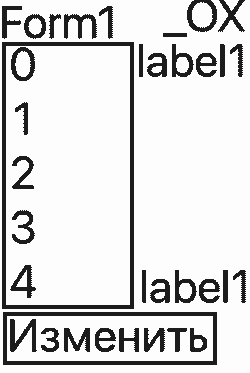

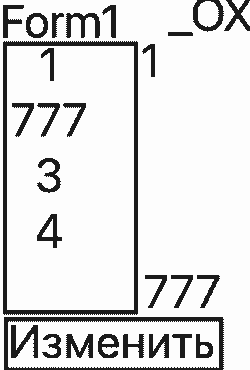

Рис. 18.2. Отображение внутреннего списка слева - до изменения, справа После изменения

У соединителя может быть только один список - или внутренний, или внешний. Как только соединитель через свойство `DataSource` будет привязан к внешнему источнику данных, внутренний список будет очищен. Внутренний список должен содержать однородные типы. Элементы внутреннего списка имеют тип `System.Object`, однако если свойство `DataSource` еще не задано, то первый объект, добавляемый в список, определяет тип списка. Это значит, что не удастся добавить в список объект другого типа. Однако можно через свойство DataSource соединителя задать базовый тип объектов списка.

Страница 194

--------

__Пример__. В примере создается внутренний списка из трех кистей. Каждая кисть имеет свой тип. Базовый класс кистей - `Brush`.

    void Form1_Load(object sender, EventArgs e)
    {
        // Так как объекты разного типа
        bindingSource1.DataSource = typeof(System.Drawing.Brush);
        // Теперь можем добавить кисти
        bindingSource1.Add(new SolidBrush(Color.Red));
        bindingSource1.Add(new TextureBrush(new Bitmap(typeof(Button), "Button.bmp")));
        bindingSource1.Add(new HatchBrush(HatchStyle.Cross, Color.Blue));
    }

# BindingNavigator
Для источников данных, привязаных к компоненту данных, `Binding Source`, также доступны операции навигации и управления в классе BindingNavigator, который предоставляет пользовательский интерфейс в стиле видеомагнитофона для переходов по элемент в пределах списка. На рис. 18.3. Показаны элемент управления BindingNavigator со вставленными стандартными Элементами. Ненужные элементы рекомендуется удалить.


Страница 195

-------

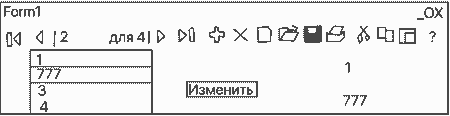

Рис. 18.3. Внешний вид элемента `BindingNavigator` с дополнительными кнопками

Объект `BindingNavigator` можно привязать к любому источнику данных, но он прежде всего предназначен для интеграции с компонентом `BindingSource` через свойство `BindingNavigator.BindingSource`. `BindingNavigator` предоставляет пользовательский интерфейс для управления текущими элементами компонента `BindingSource`. По умолчанию элемент управления `BindingNavigator` предлагает кнопки, отвечающие методам навигации компонента BindingSource, но, щелкнув кнопку со стрелочкой, разработчик может добавить на панель стандартные элементы. __Кнопки__ «`Добавить`» и «`Удалить`» имеют уже готовую реализацию, однако не всегда она удовлетворяет разработчиков. Так, по кнопке "Добавить" добавляется объект по умолчанию (метод `AddNew`), поэтому лучше добавить обработчик события `Click` для этой кнопки и вручную создать новый объект, определив значения всех параметров конструктора, пелкните днажды кнопку `+`, отобразится обработчик. __Пример кода__.

    private void bindingNavigatorAddNewltem_Click(object sender, EventArgs e)
    {
        // Создайте здесь объект и добавьте его в источник.
        Form2 frm2 = new Form2();
        frm2.ShowDialog();
        bindingSource1.Add(frm2.newObj);
    }

Создайте новый объект в дочерней форме. Объект по умолчанию можно без проблем создавать в DataGridView, так как пользователь в режиме редактирования строки во многих случаях может ввести все нужные значения в автоматически созданный объект.

Страница 196

------------

# ФИЛЬТРАЦИЯ СТРОК ИСТОЧНИКА ДАННЫХ
Для фильтрации объектов источника данных можно использовать свойство `BindingSource.Filter`, которое рекомендуется применять для классов `DataTable` и `DataView ADO .NET`. Если значение свойства `Filter` He равно `null`, объект `BindingSource` передает это свойство в базовый список. Если задать это свойство во время инициализации объекта, вызов будет отложен до момента завершения инициализации. Чтобы задать значение фильтра, нужно указать имя столбца, после которого следует оператор, а затем значение, по которому выполняется фильтрация. Значение фильтра необходимо заключать в кавычки, например, `"LastName = 'Smith'"`. Допустимый синтаксис зависит от базового источника данных. Если базовый источник данных имеет тип `DataSet`, `DataTable` или `DataView`, можно задавать логические выражения с помощью синтаксиса, приведенного в документации по свойству `DataColumn.Expression`. Значение свойства `Filter` будет сохраняться во время изменения источника данных. Чтобы прекратить фильтрацию свойства `DataSource`, вызовите метод `RemoveFilter`. __Пример__. В приведенном ниже фильтре рассматриваются только записи таблицы со значениями столбца `artist`, равными "Броневой", `source1.Filter = "artist = 'Броневой"";`. Фильтр для таблиц должен удовлетворять синтаксису предложения `Where` языка `SQL`. __Пример__. Сложное условие фильтрации. `source1.Filter = "artist Like '*Mat*' or artist Like '*Mer*";`

Страница 197

---------

# ИСПОЛЬЗОВАНИЕ Yield ДЛЯ ФОРМИРОВАНИЯ ИСТОЧНИКА ДАННЫХ
Класс `BindingSource` позволяет привязать данные, реализующие в упрощенном виде лишь один интерфейс `IEnumerable`. Поэтому возможна, например, привязка, в которой очередное значение возвращается из перечислителя с помощью ключевого слова `yield`.

__Пример__. Ниже приведена программа, в которой объекты создаются в цикле и предоставляются с помощью ключевого слова `yield` для привязки.
 
    public partial class Form1 : Form
    {
        public Form1()
        {
            InitializeComponent();
            // bindingSource1 - объект типа BindingSource
            bindingSource1.DataSource = new PersonCollection();
            listBox1.DataSource = bindingSource1;
            listBox1.DisplayMember = "Name";
        }
    }
    public class PersonCollection: IEnumerable
    {
        public IEnumerator GetEnumerator()
        {
            for(uint i = 0; i <= 5; i++)
            yield return new Person("Студент" +i.ToString(), 20+i, 'M');
        }
    }

Страница 198

---------


    public class Person
    {
        public string Name {get; set;};
        public uint Age {get; set; };
        public char Gender {get; set;};
        public Person(string name, uint age, char gender)
        { Name = name; Age = age; Gender = gender; }
    {

Оператор `yiela` запоминает состояние цикла на момент выхода из него по `return` или `break` и при повторном входе в цикл продолжает его выполнение с ранее запомненного состояния. При этом компилятор автоматически создает все необходимые средства класса `IEnumerator` для работы с объектами, возвращаемыми циклом. Фактически цикл с `yield` — это коллекция. Оператор `yield` используется в блоке итератора для предоставления значения объекта перечислителя или для сообщения о конце итерации. Синтаксис оператора yield:

    yield return ‹expression>;
    yield break;

Выражение `expression` вычисляется и возвращается в виде значения объекту перечислителя; выражение `expression` должно неявно преобразовываться в тип результата итератора. На внутреннем уровне (за «кулисами») при обработке ключевого слова `yield` компилятор динамически генсрирует в рамках соответствующего класса определение вложенного класса. В этом классе создаются метод `MoveNext` и свойство `Current`. (`Метод Reset` не генерируется.) Оператор `yield` не обязан быть последним в блоке цикла. Если он находится в середине, то выполнение блока продолжается со следующего оператора после `yield`.

Страница 199

-----------

# ВСТРОЕННЫЕ И ССЫЛОЧНЫЕ ТИПЫ ИСТОЧНИКА ДАННЫХ
Изменения данных в источнике по-разному отражаются на списке элемента управления в зависимости от того, являются данные значимыми или ссылочными типами. Если источник содержит данные значимого (элементарного) типа (int, float и т.д.), то эти данные копируются методом Add в списочный элемент управления (передача параметра по значению). Поэтому изменение данных в источнике не влияет на данные в списочном элементе управления. Рассмотрим следующий пример кода:
    
    List<int> list;
    private void Form1_Load(object sender, EventArgs e)
    {
        list = new List<int>();
        list.Add(0);
        list.Add(1);
        list.Add(2);
        list.Add(3);
        list.Add(4):
        bindingSource1.DataSource = list;



Страница 200

--------------